In [103]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import Markdown, display

dataX = np.loadtxt("preprocessed_data/dataX.csv", delimiter=",")[:,:-1] # Leave out temperature
dataY = np.loadtxt("preprocessed_data/dataY.csv", delimiter=",")

channels = ["560nm","585nm","610nm","645nm","680nm","705nm","730nm","760nm","810nm","860nm","900nm","940nm"]

def printHeadline(str):
    display(Markdown(f"## {str}"))

In [104]:
channel_data = []
# Initialize channel data
for channel in channels:
    channel_data.append({"name": channel})
    
# Add data to channel data
for i in range(len(channels)):
    channel_data[i]["x"] = np.copy(dataX[:,i])
    channel_data[i]["y"] = np.copy(dataY)

## Intensity vs. Concentration. Separated by channel and measurement.

## Channel: 560nm

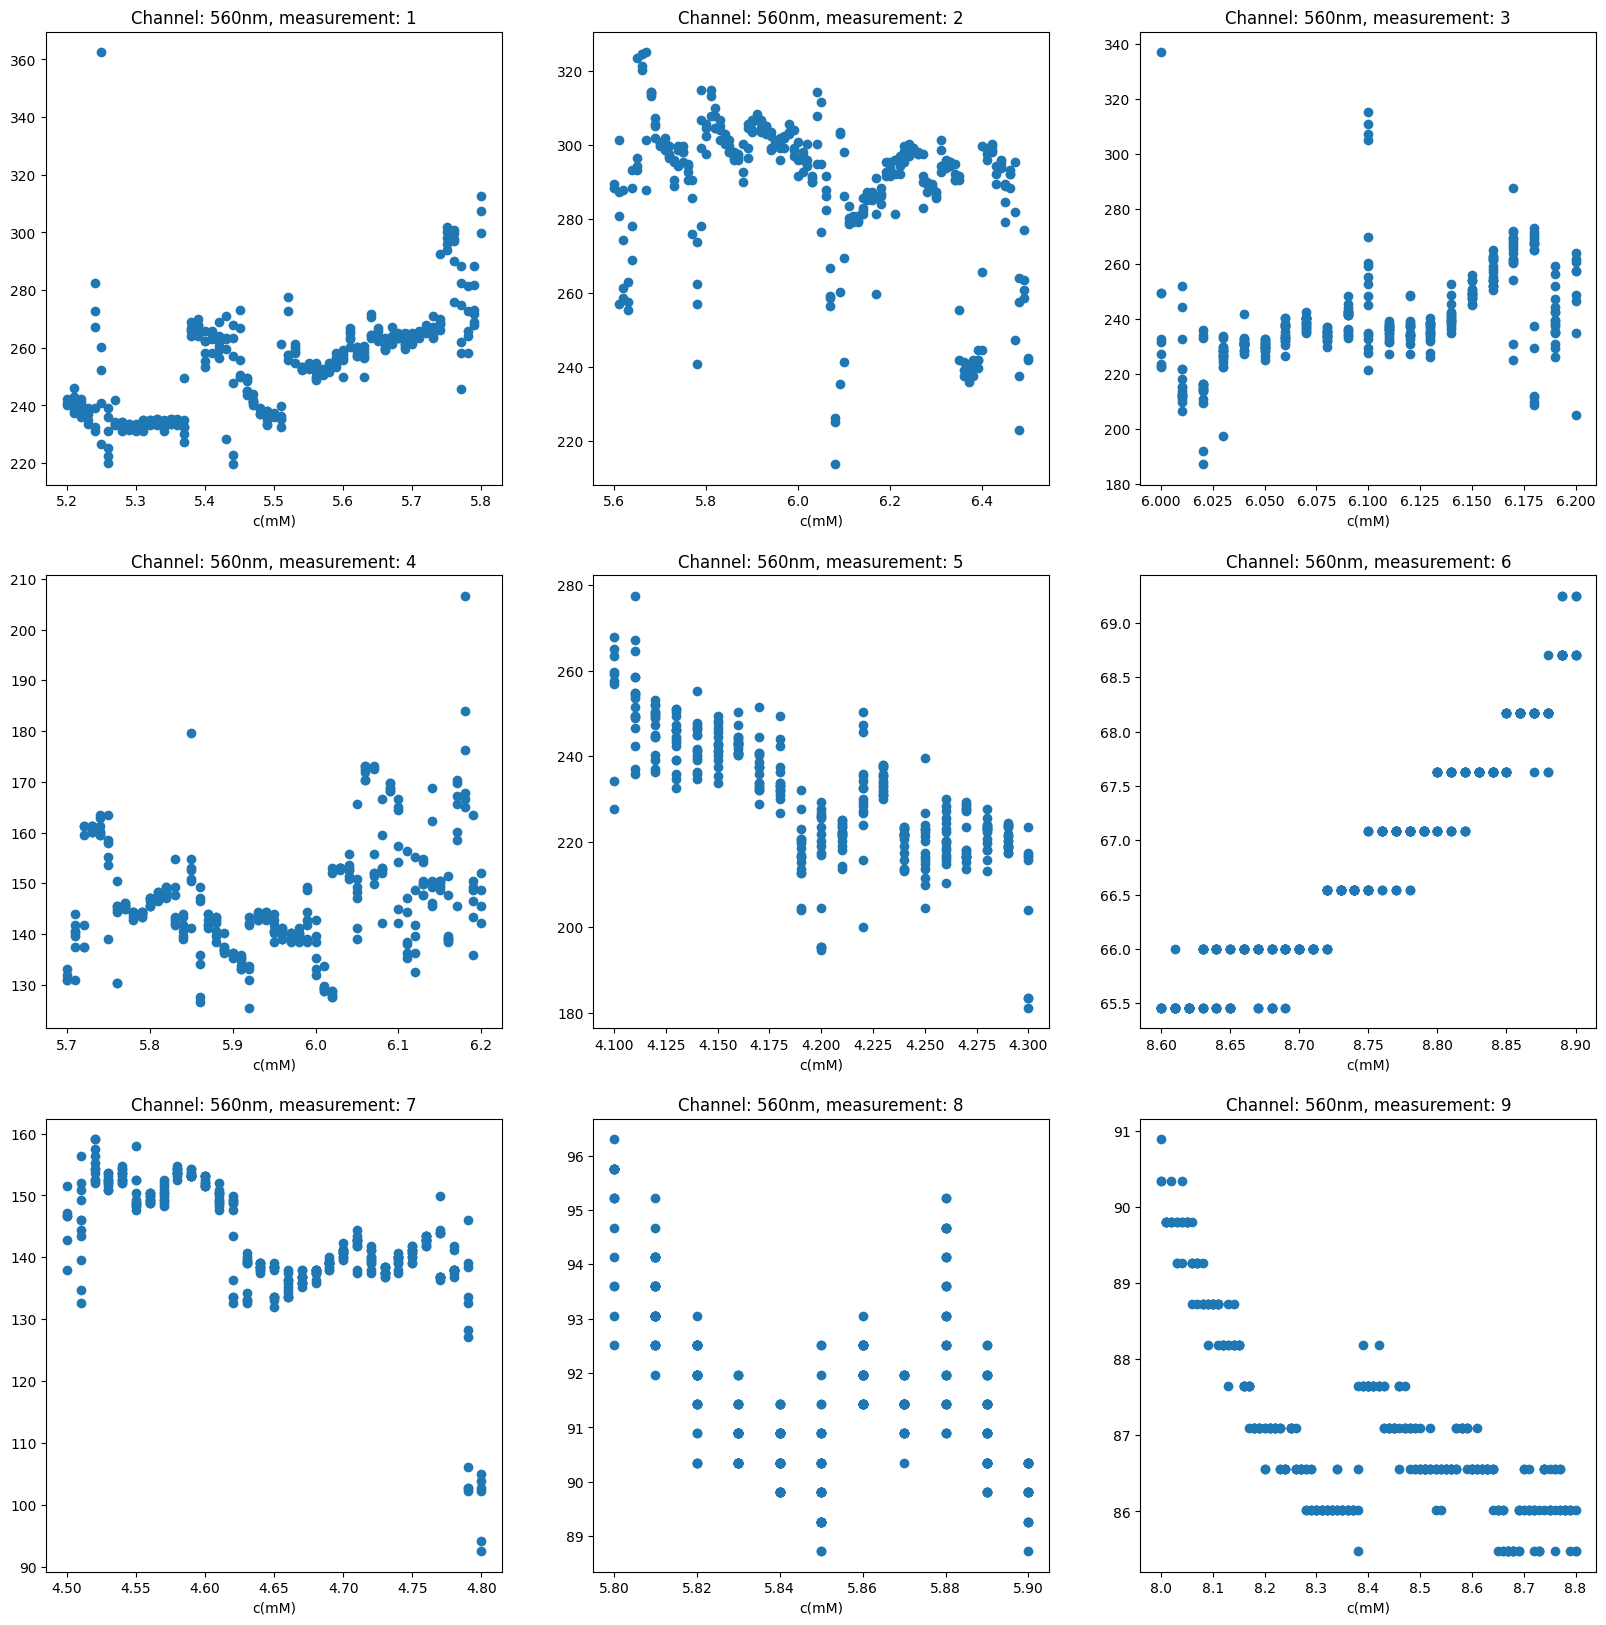

## Channel: 585nm

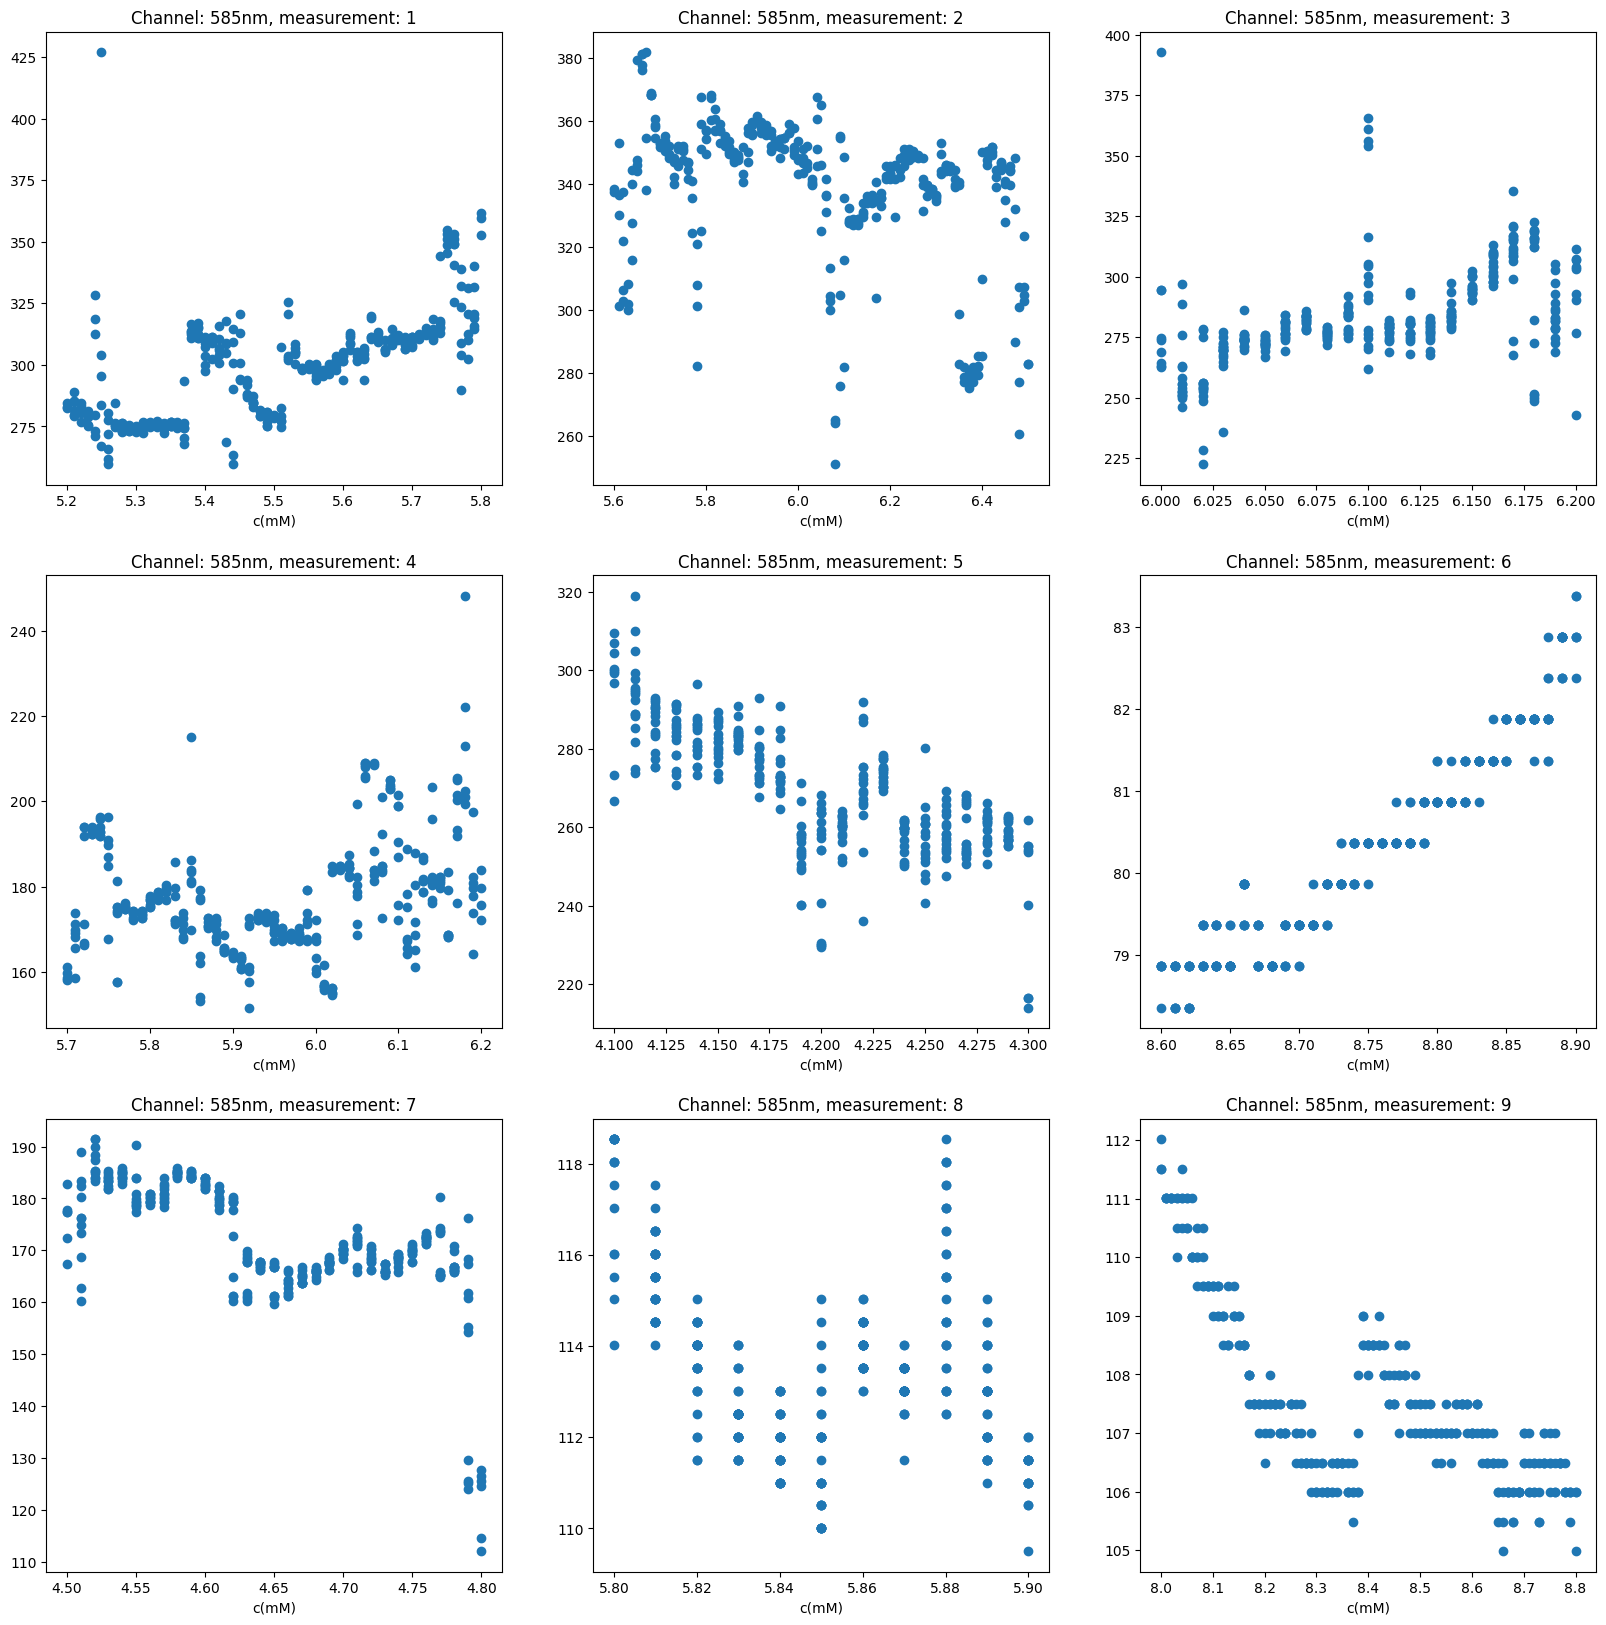

## Channel: 610nm

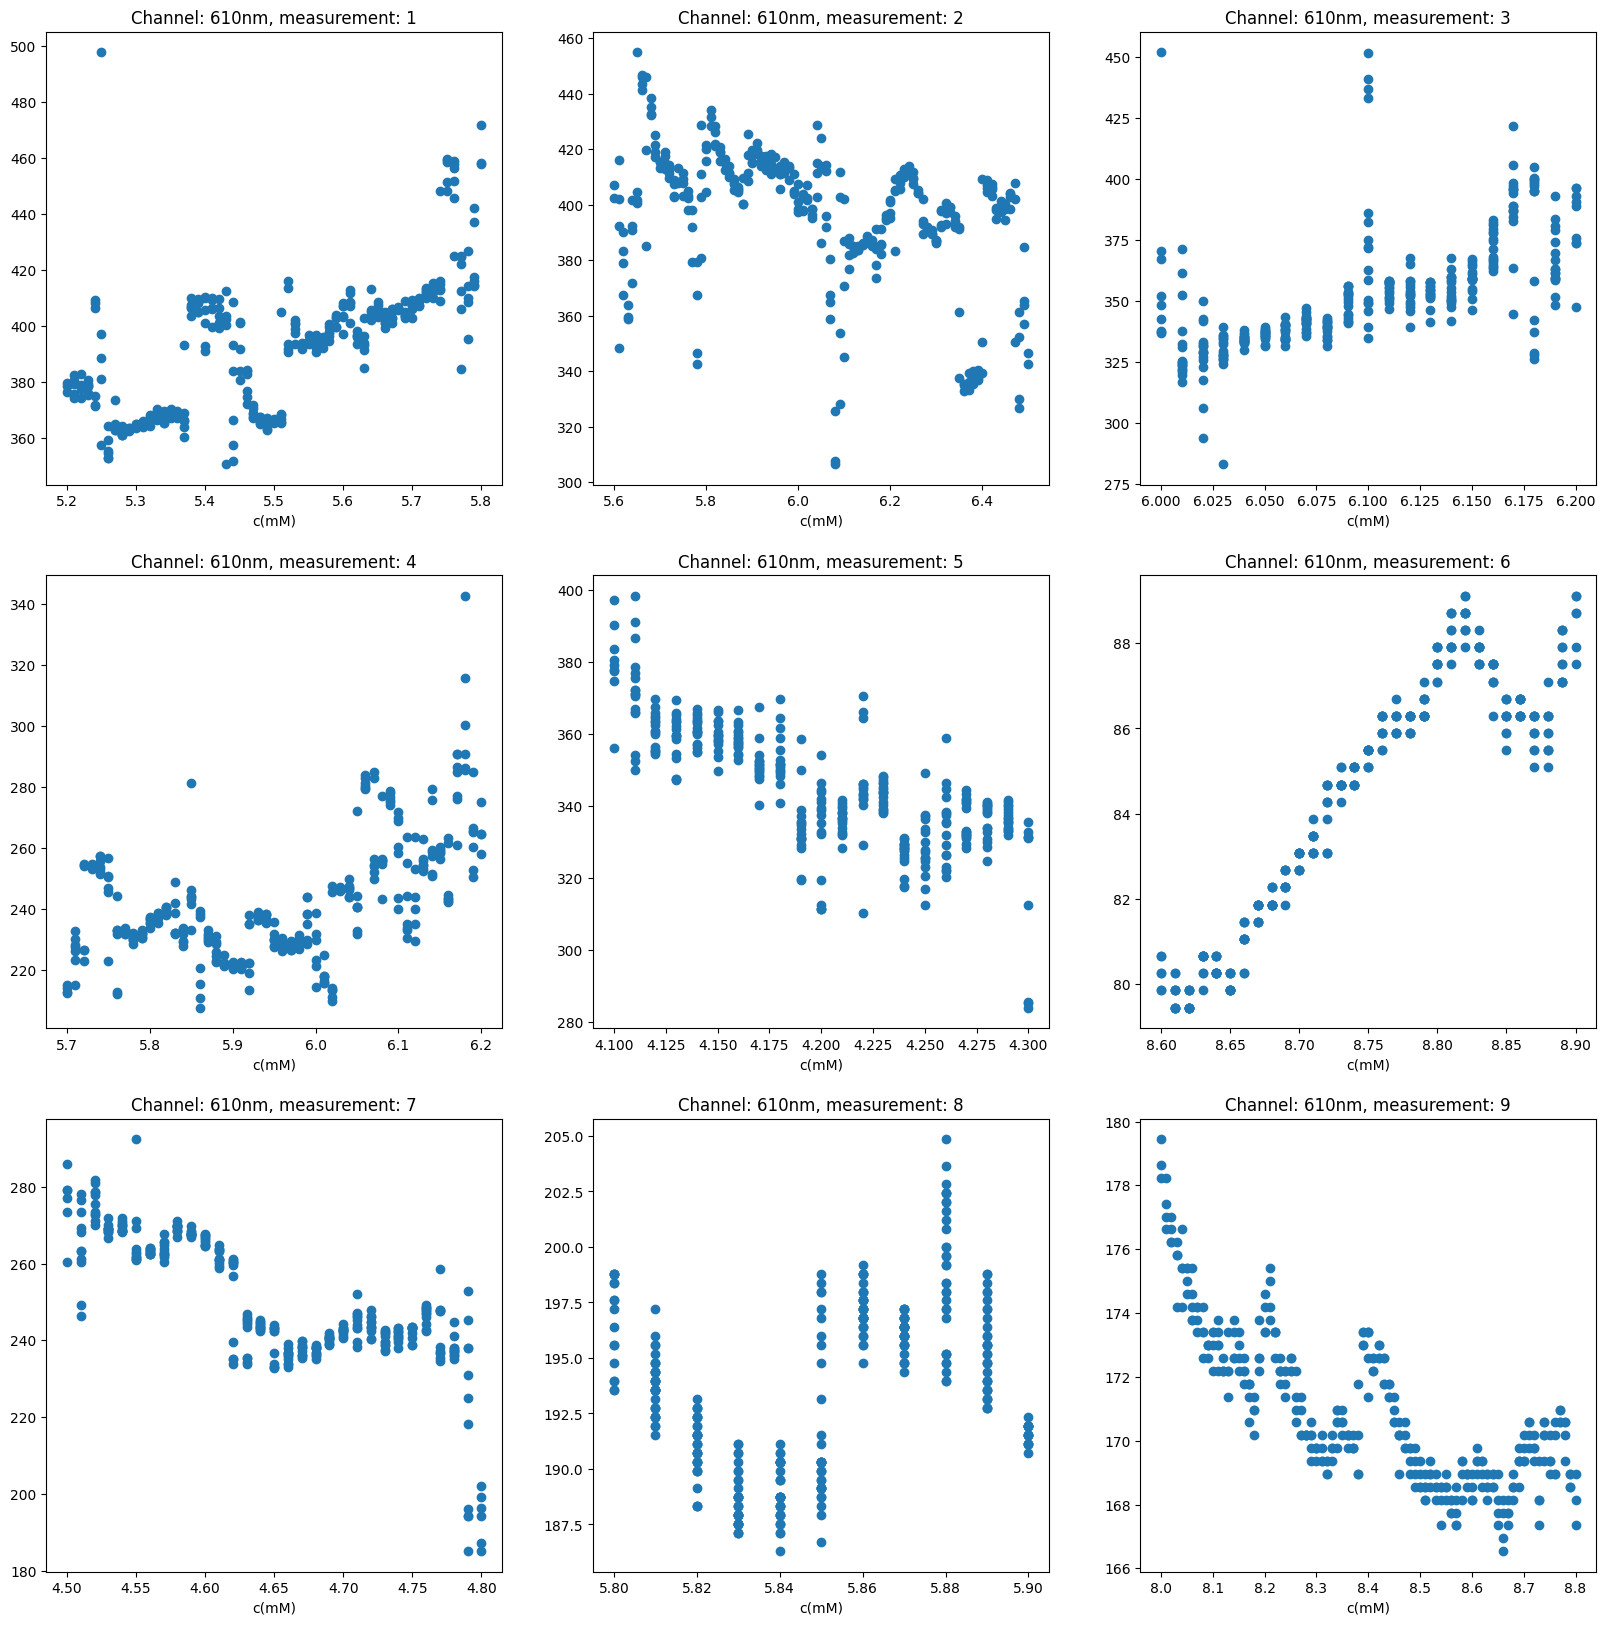

## Channel: 645nm

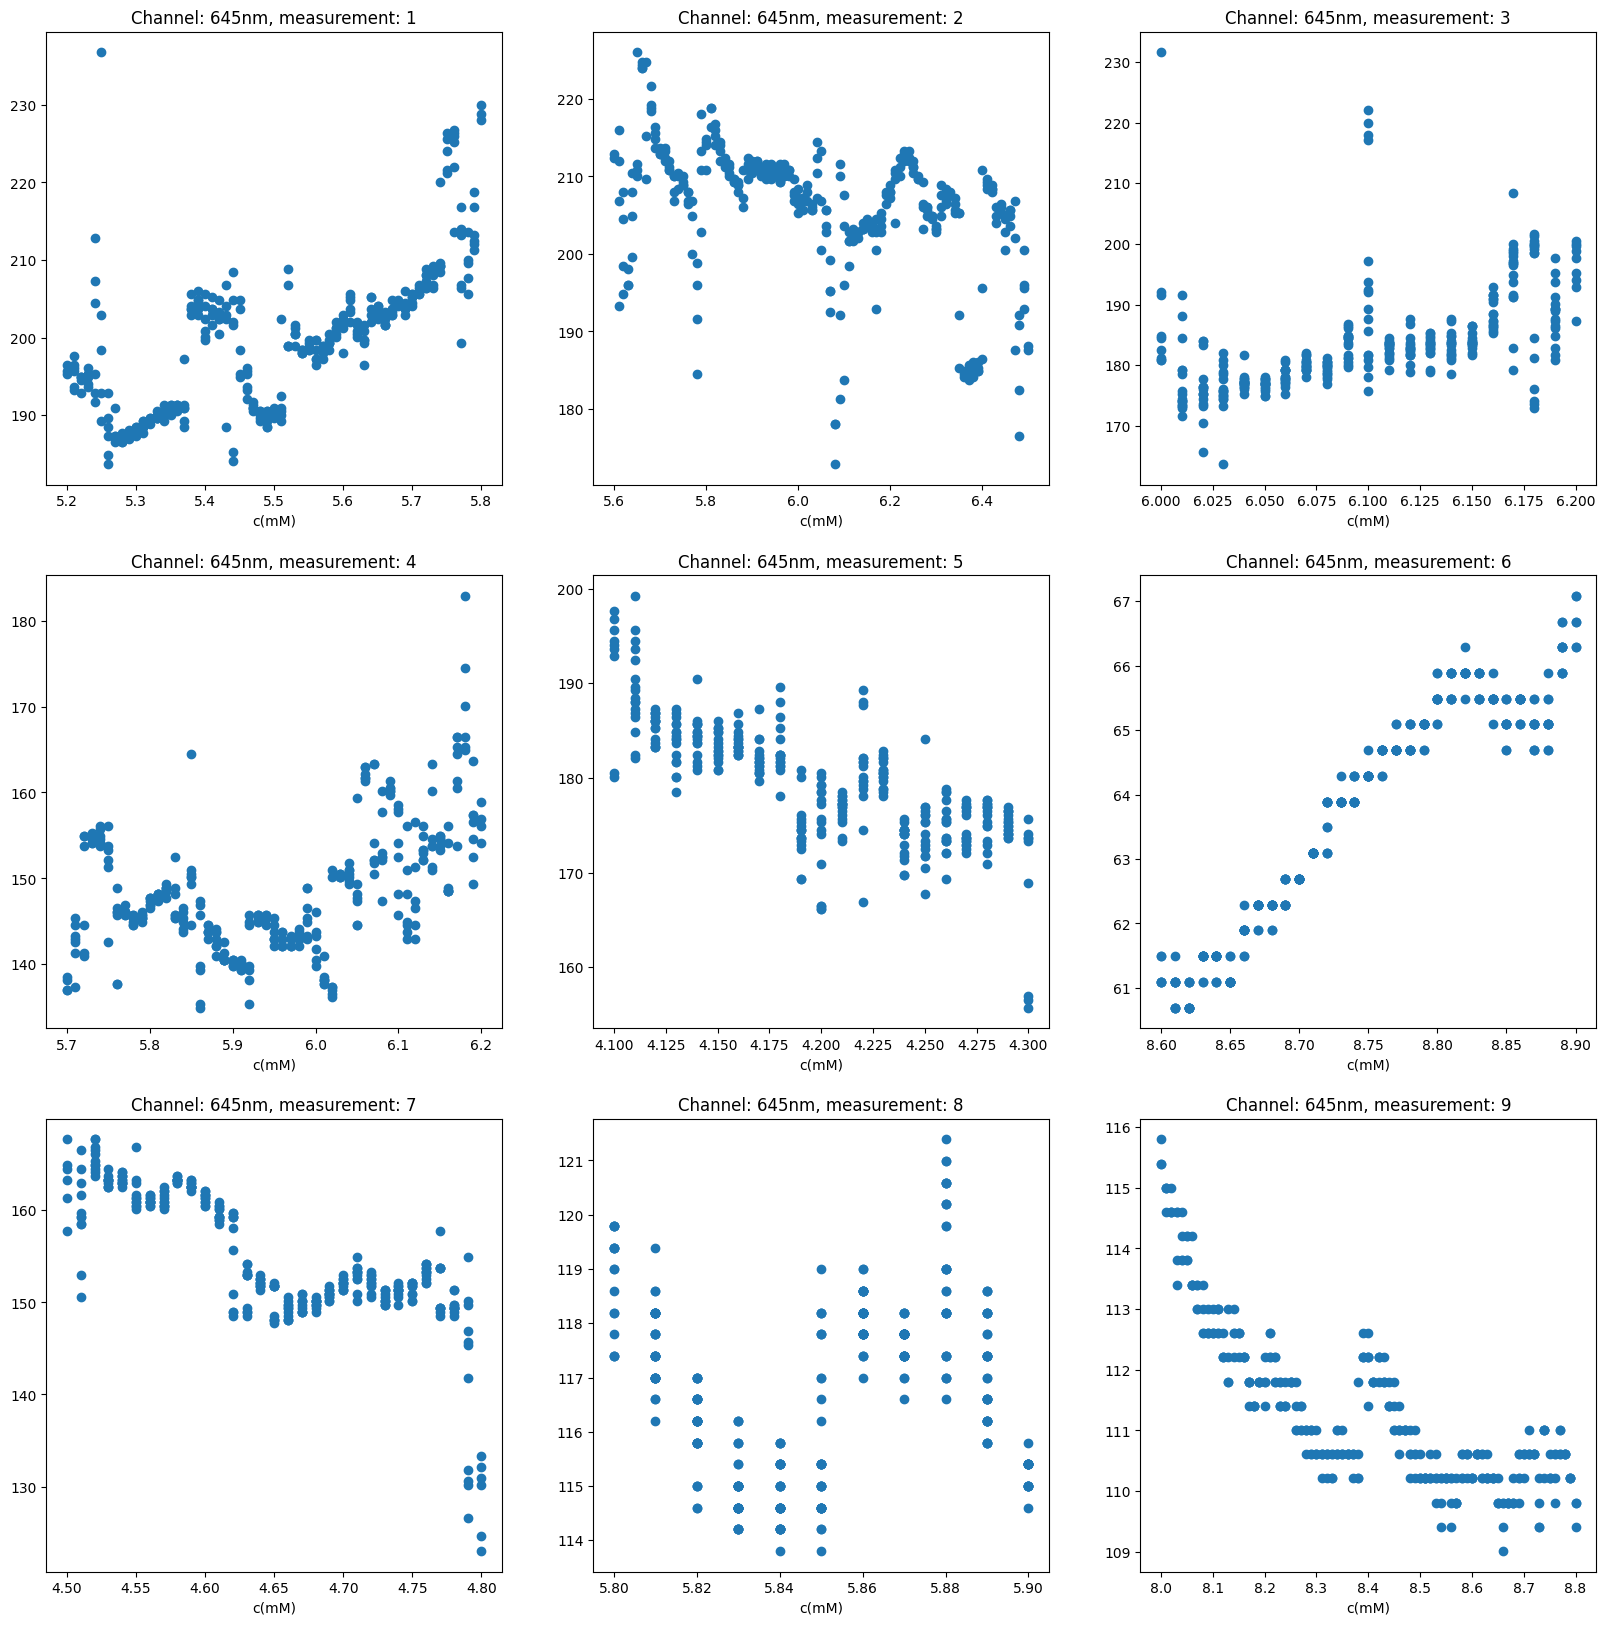

## Channel: 680nm

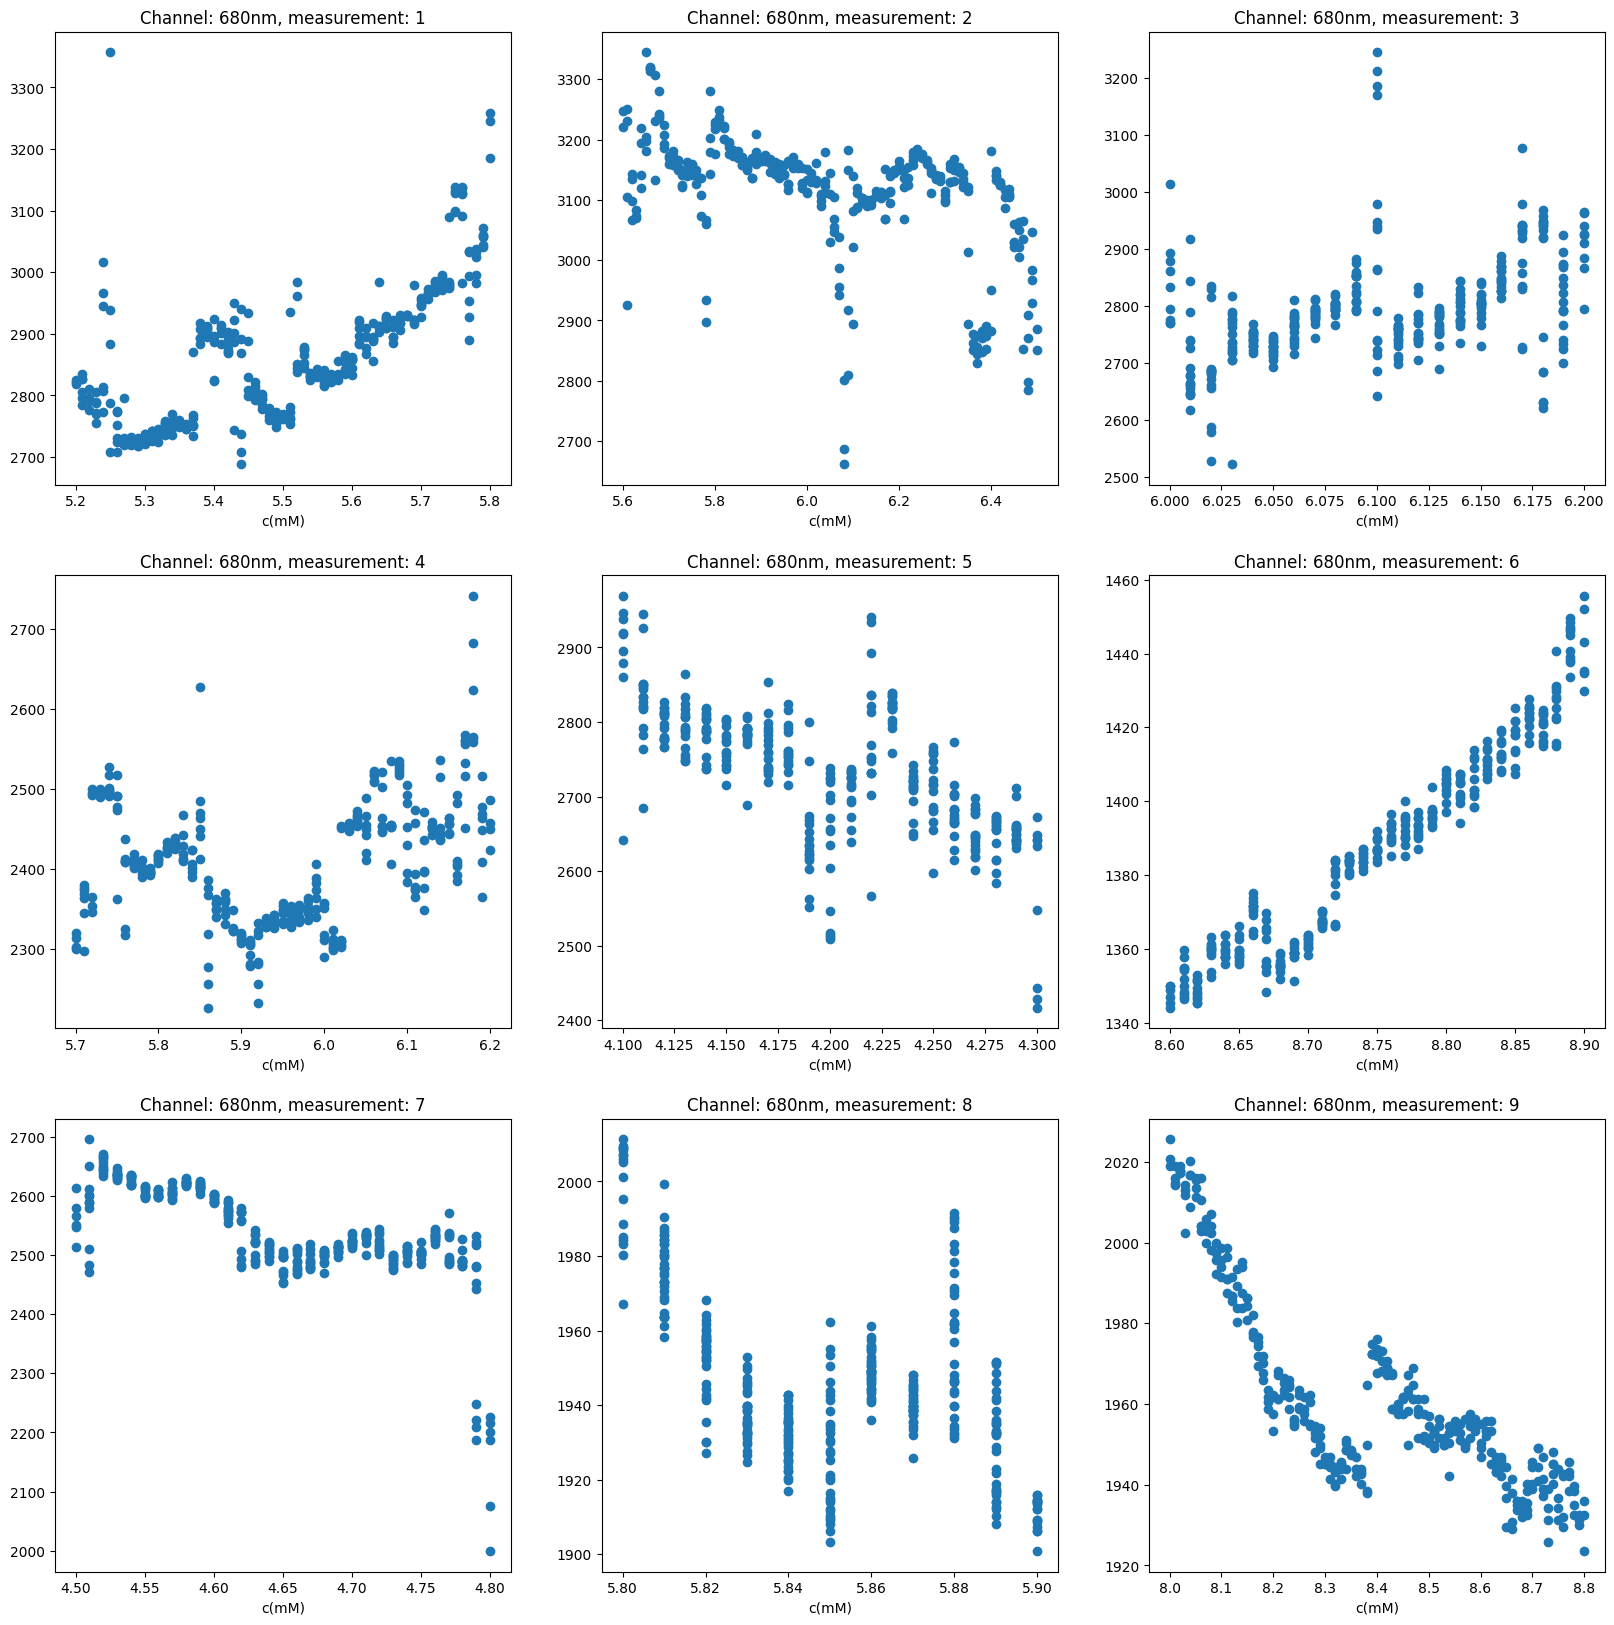

## Channel: 705nm

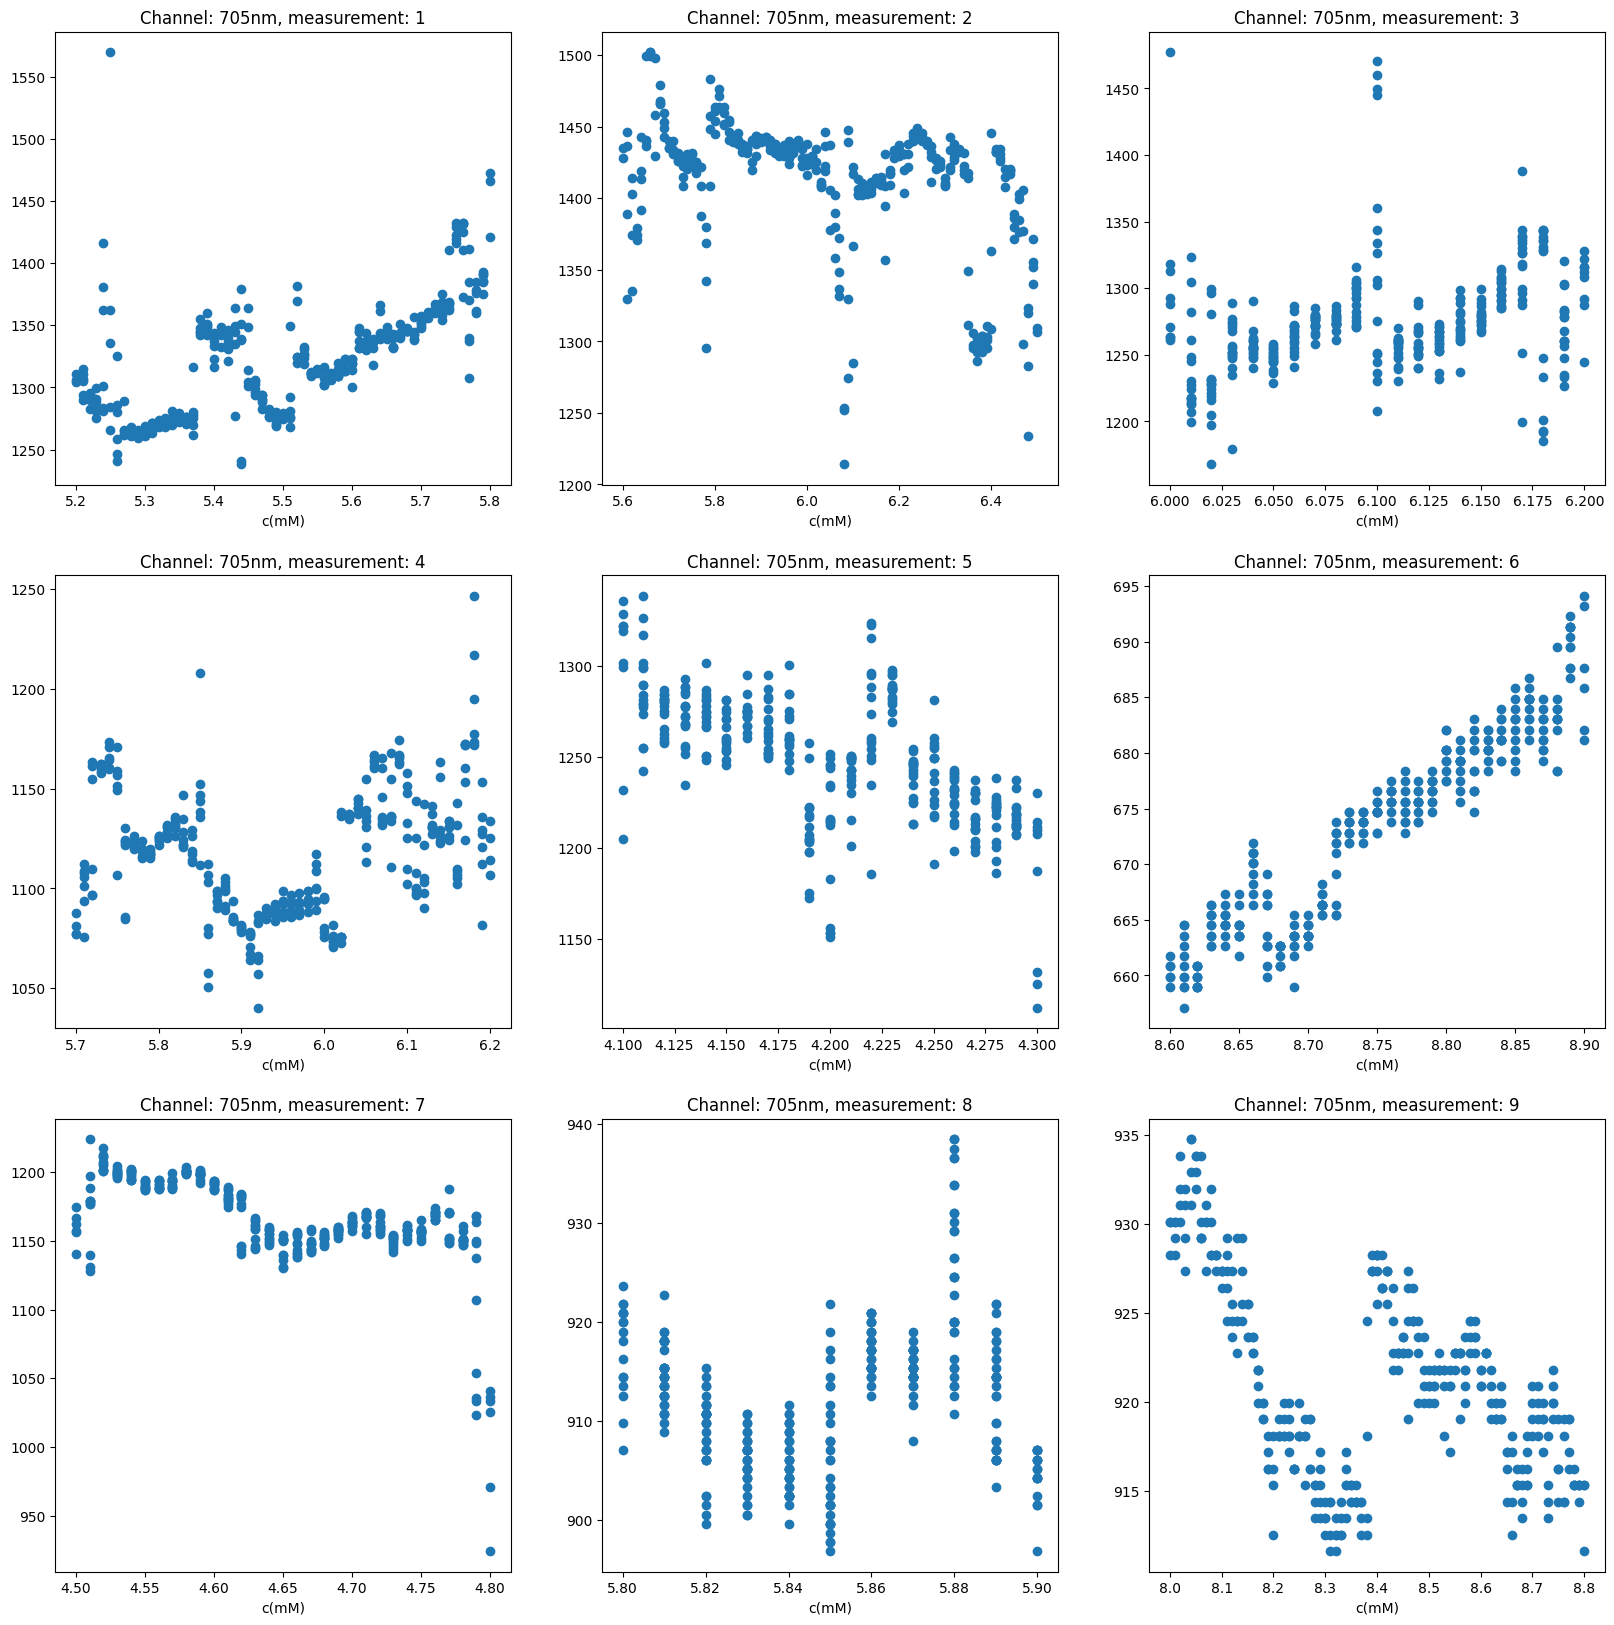

## Channel: 730nm

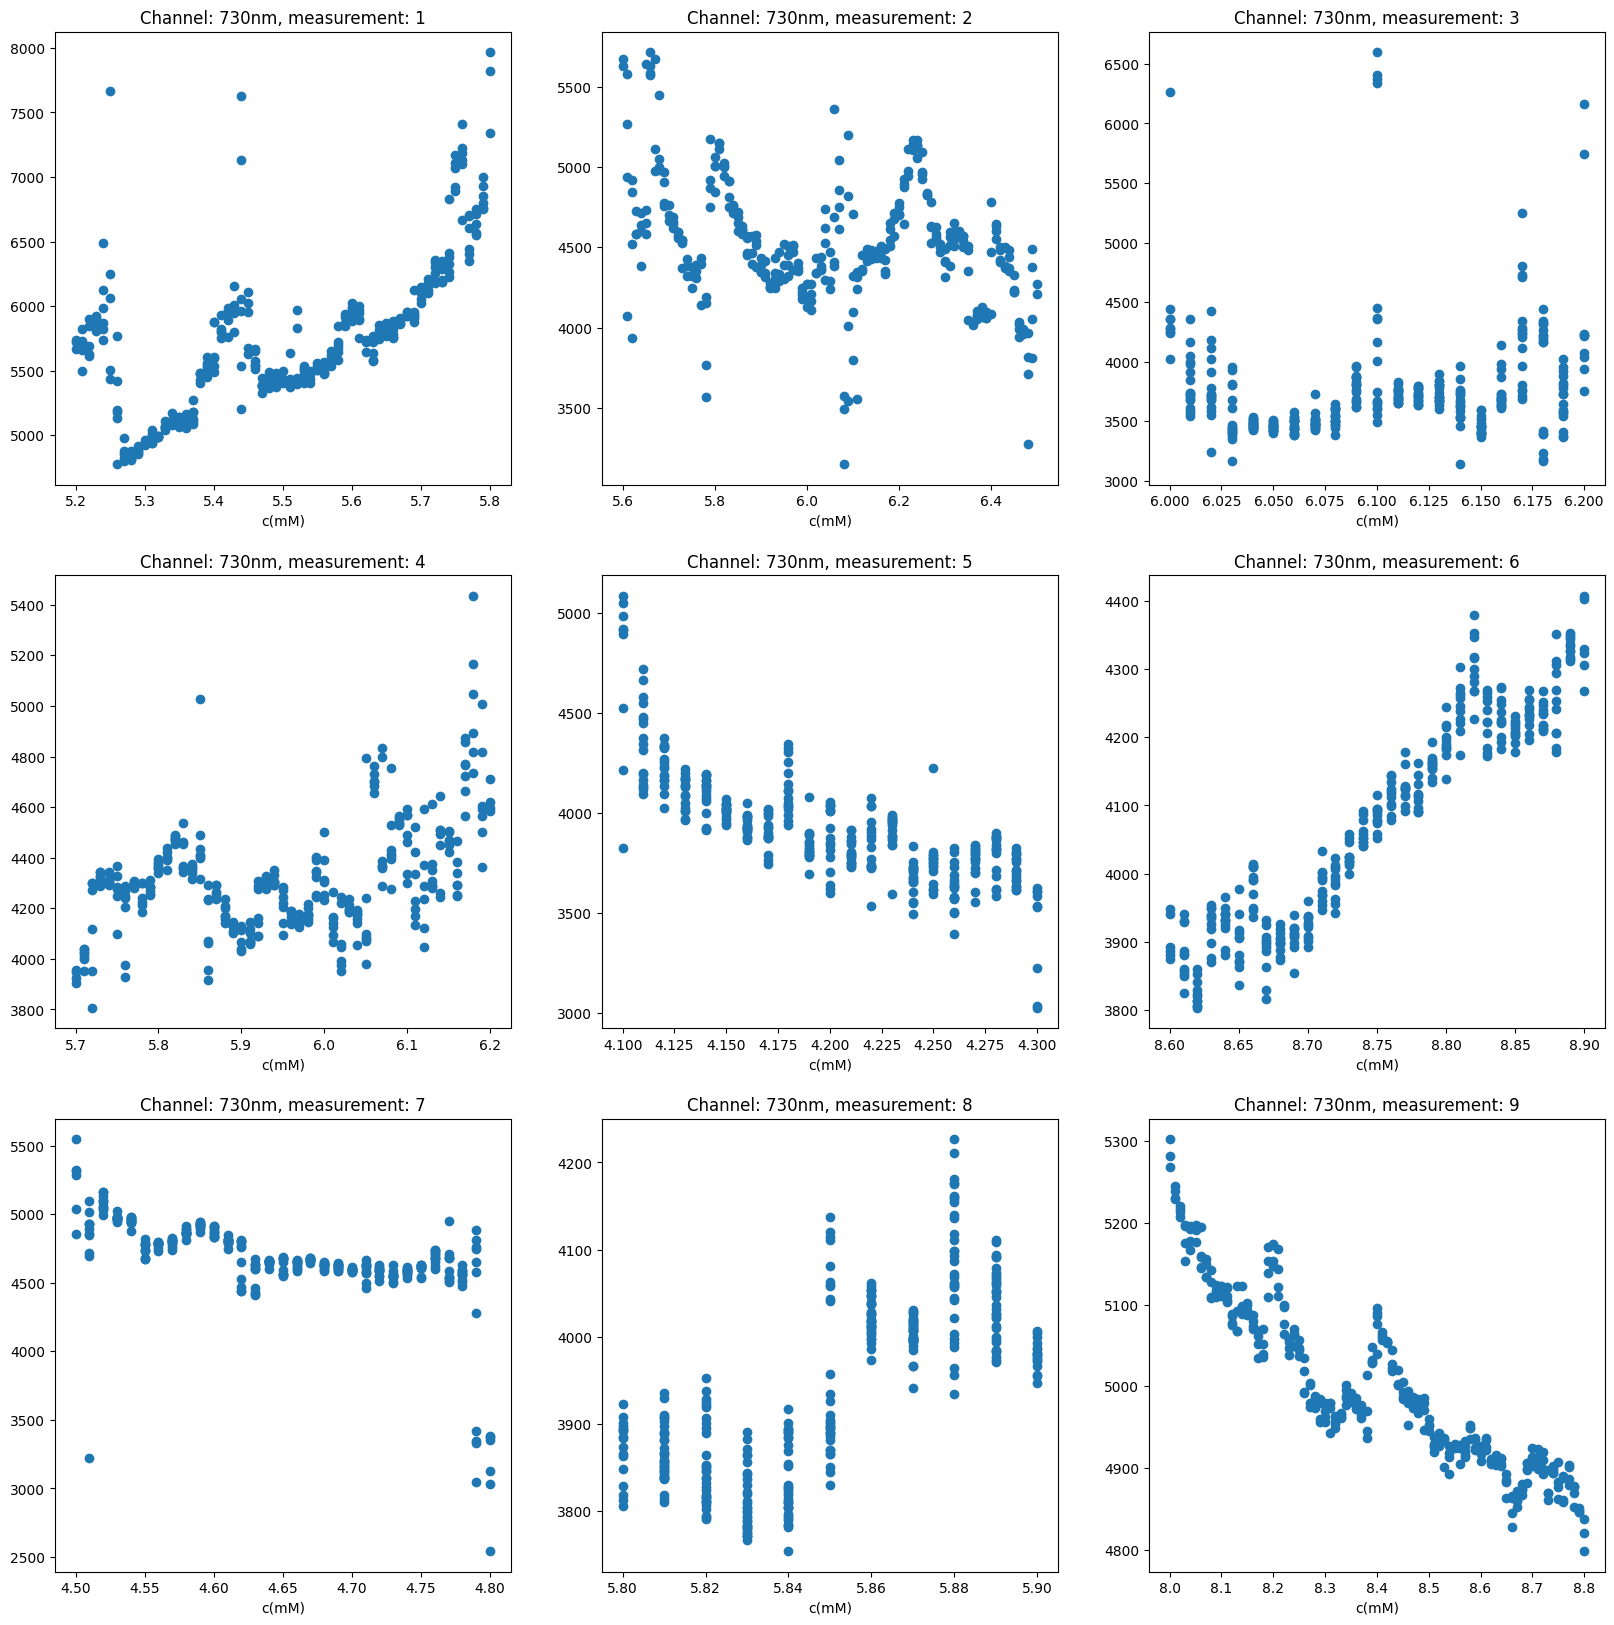

## Channel: 760nm

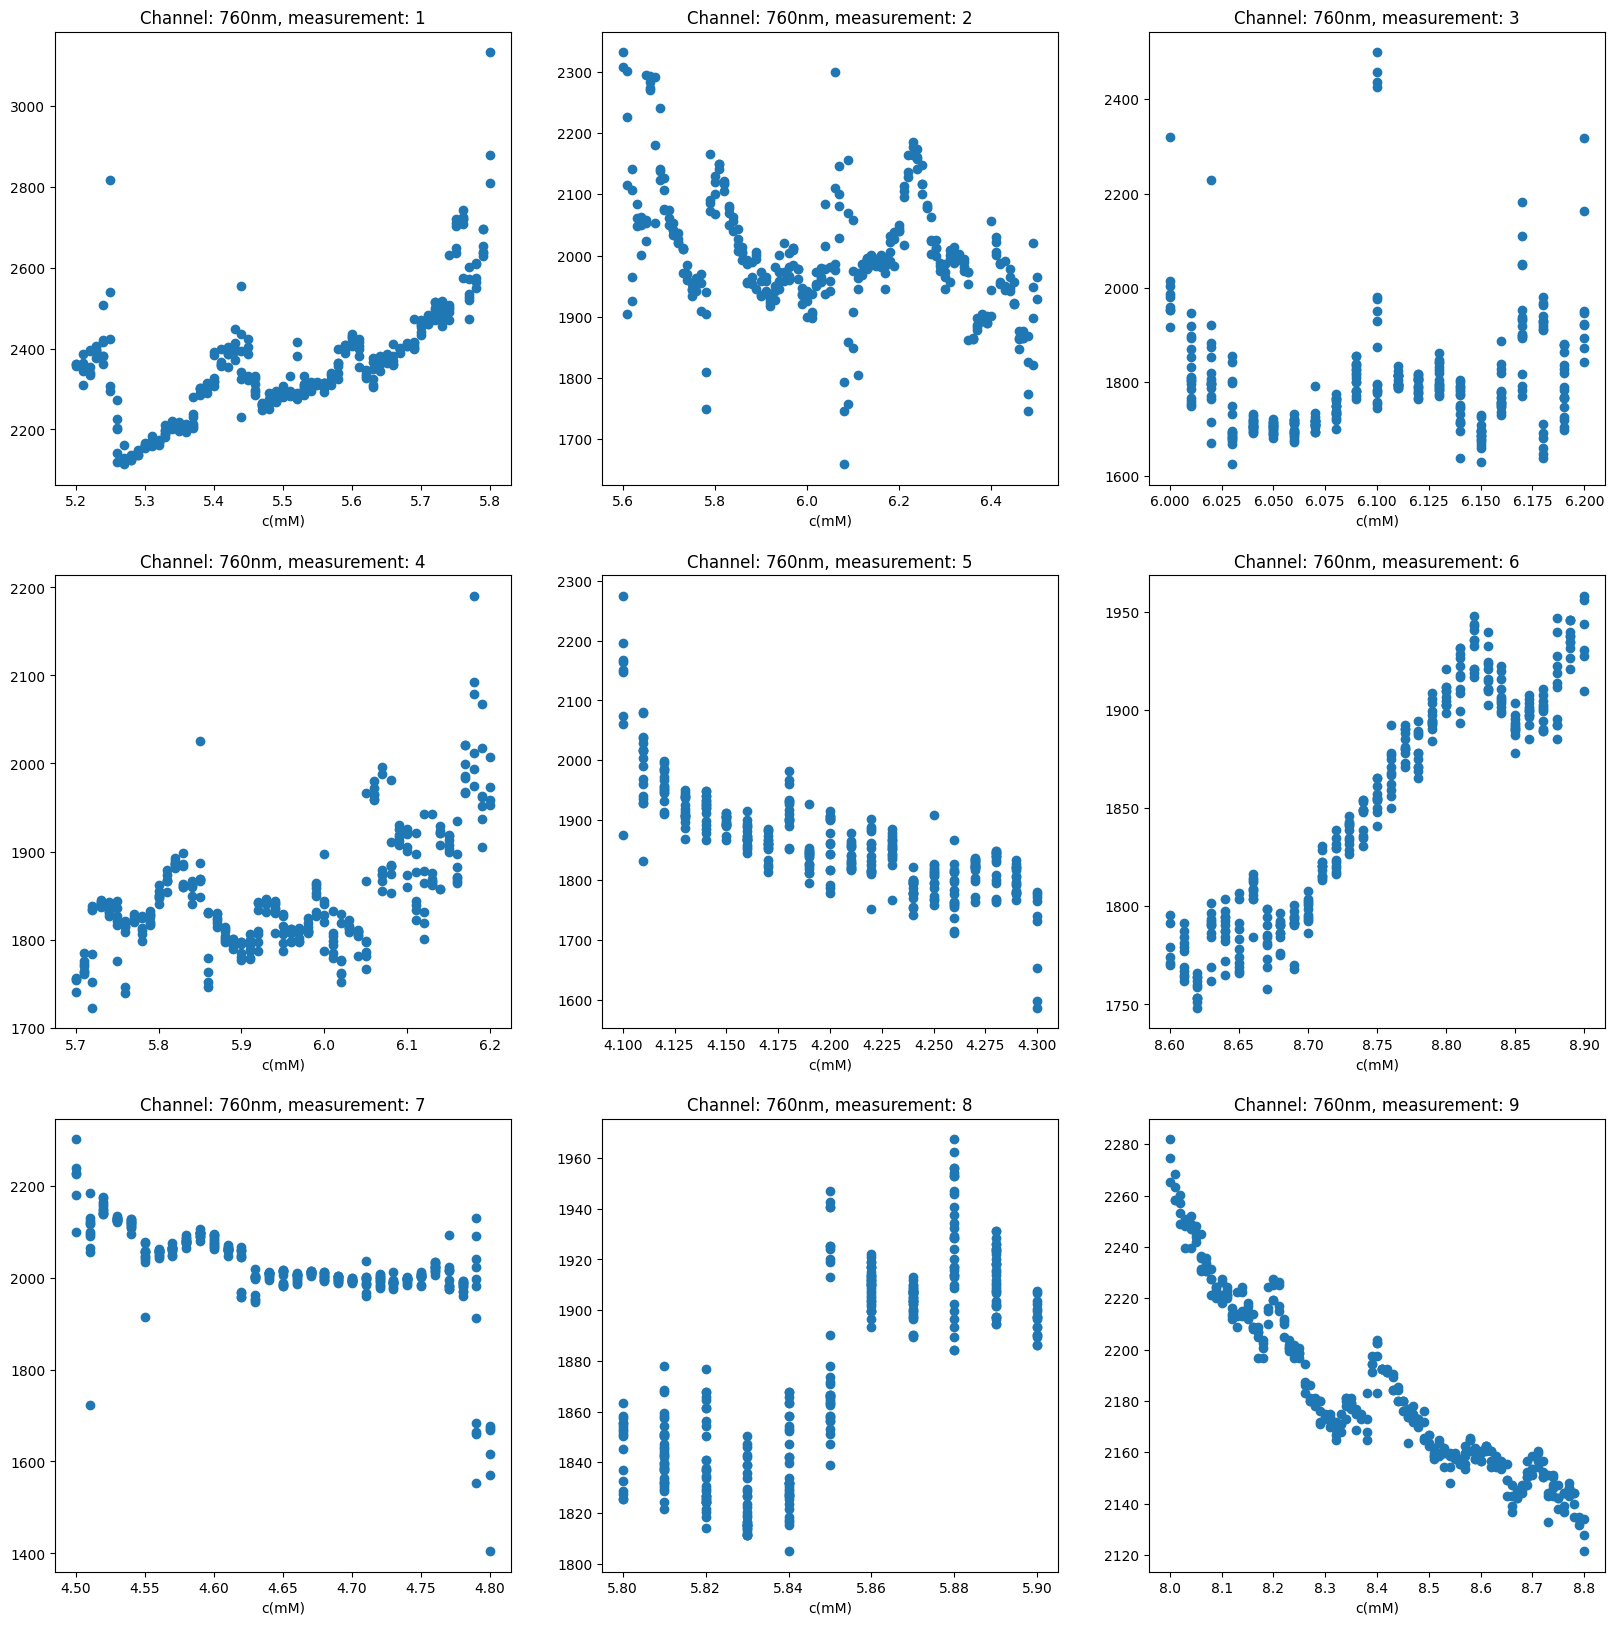

## Channel: 810nm

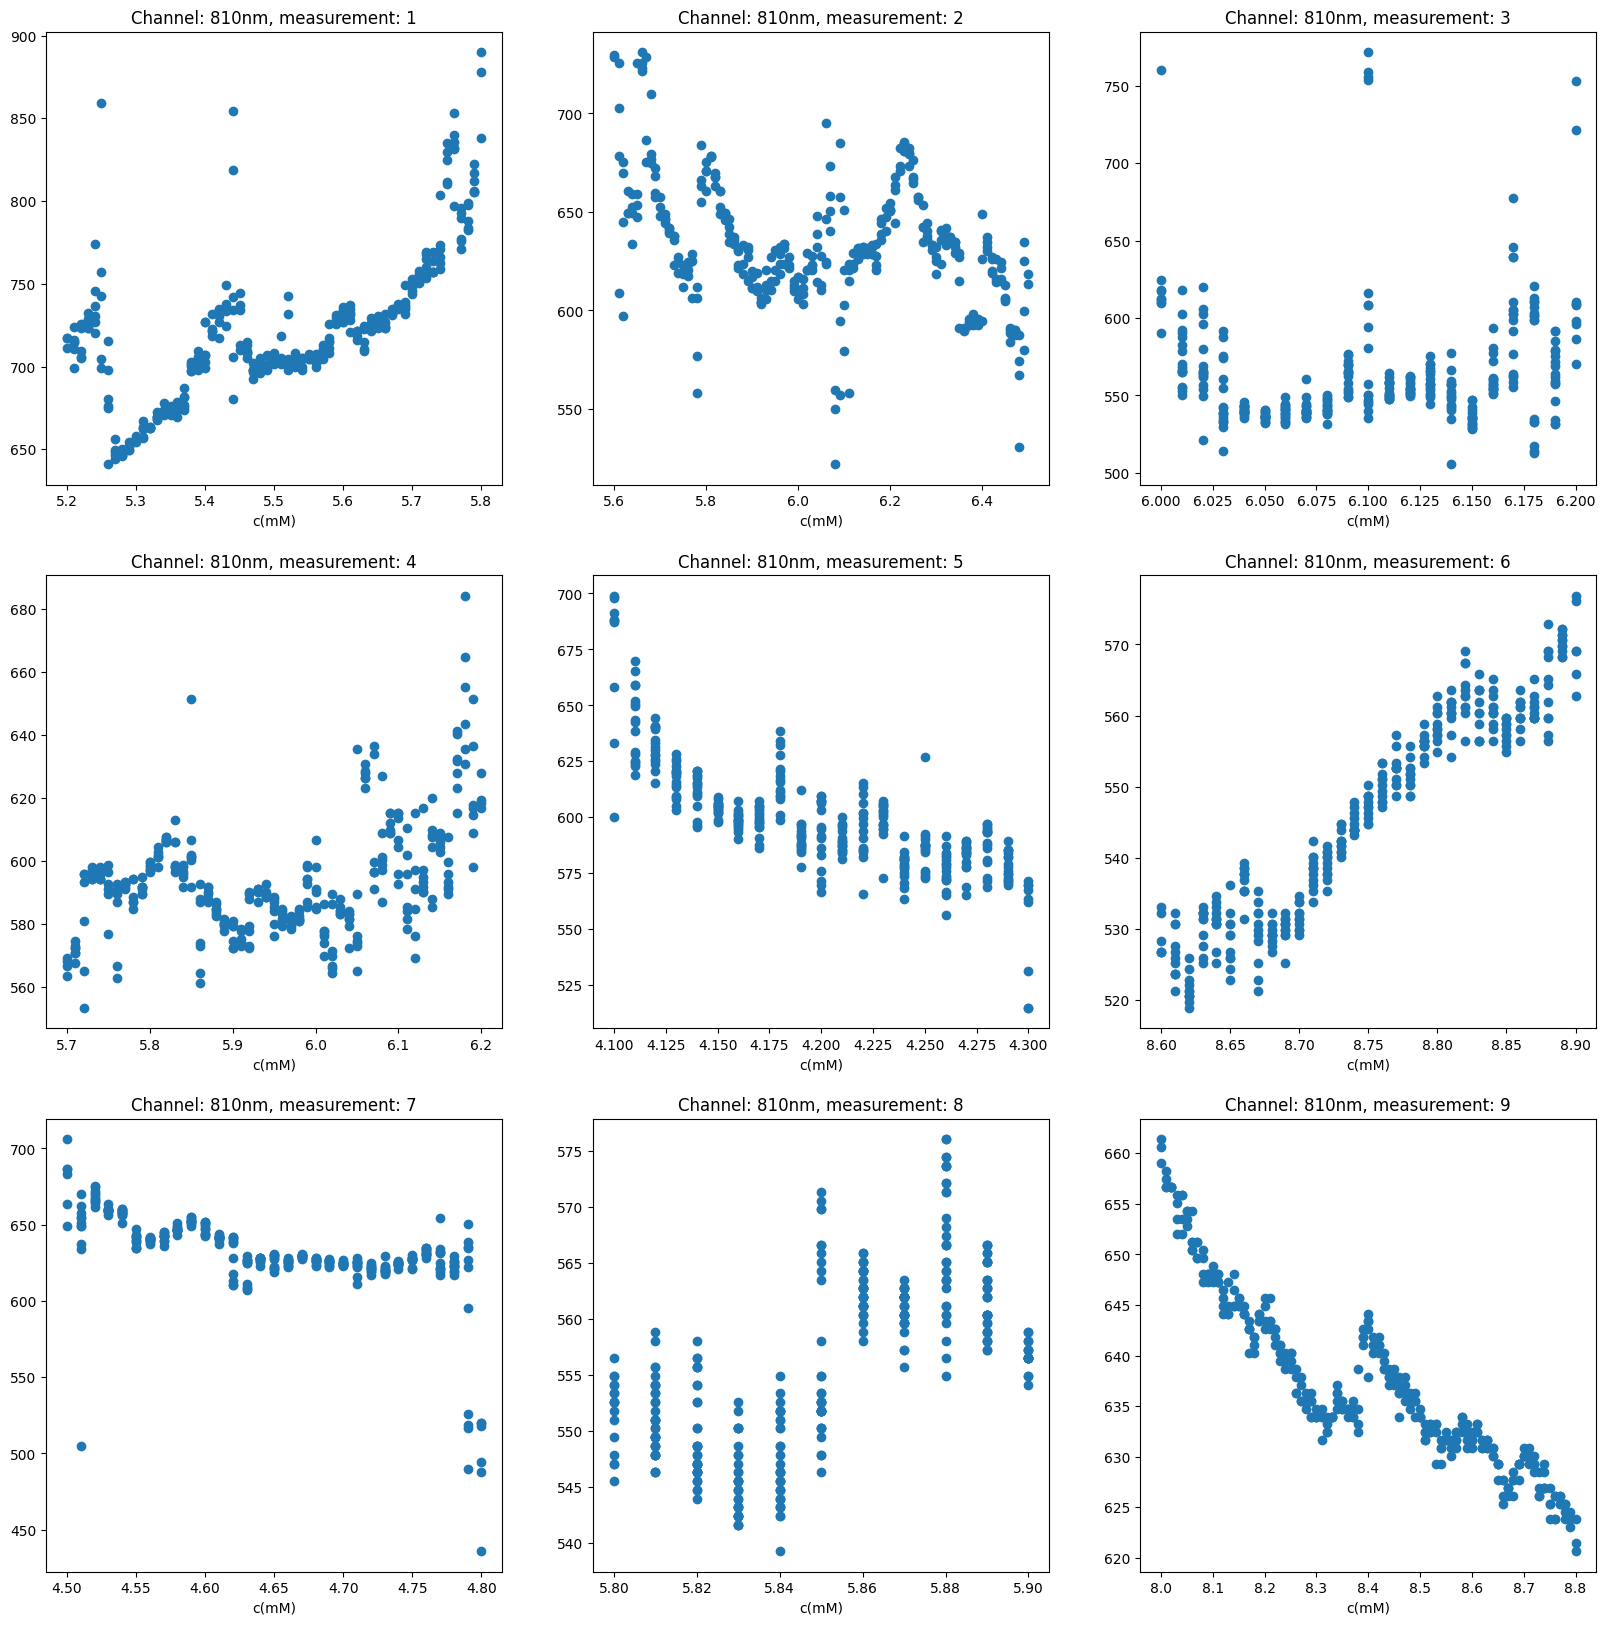

## Channel: 860nm

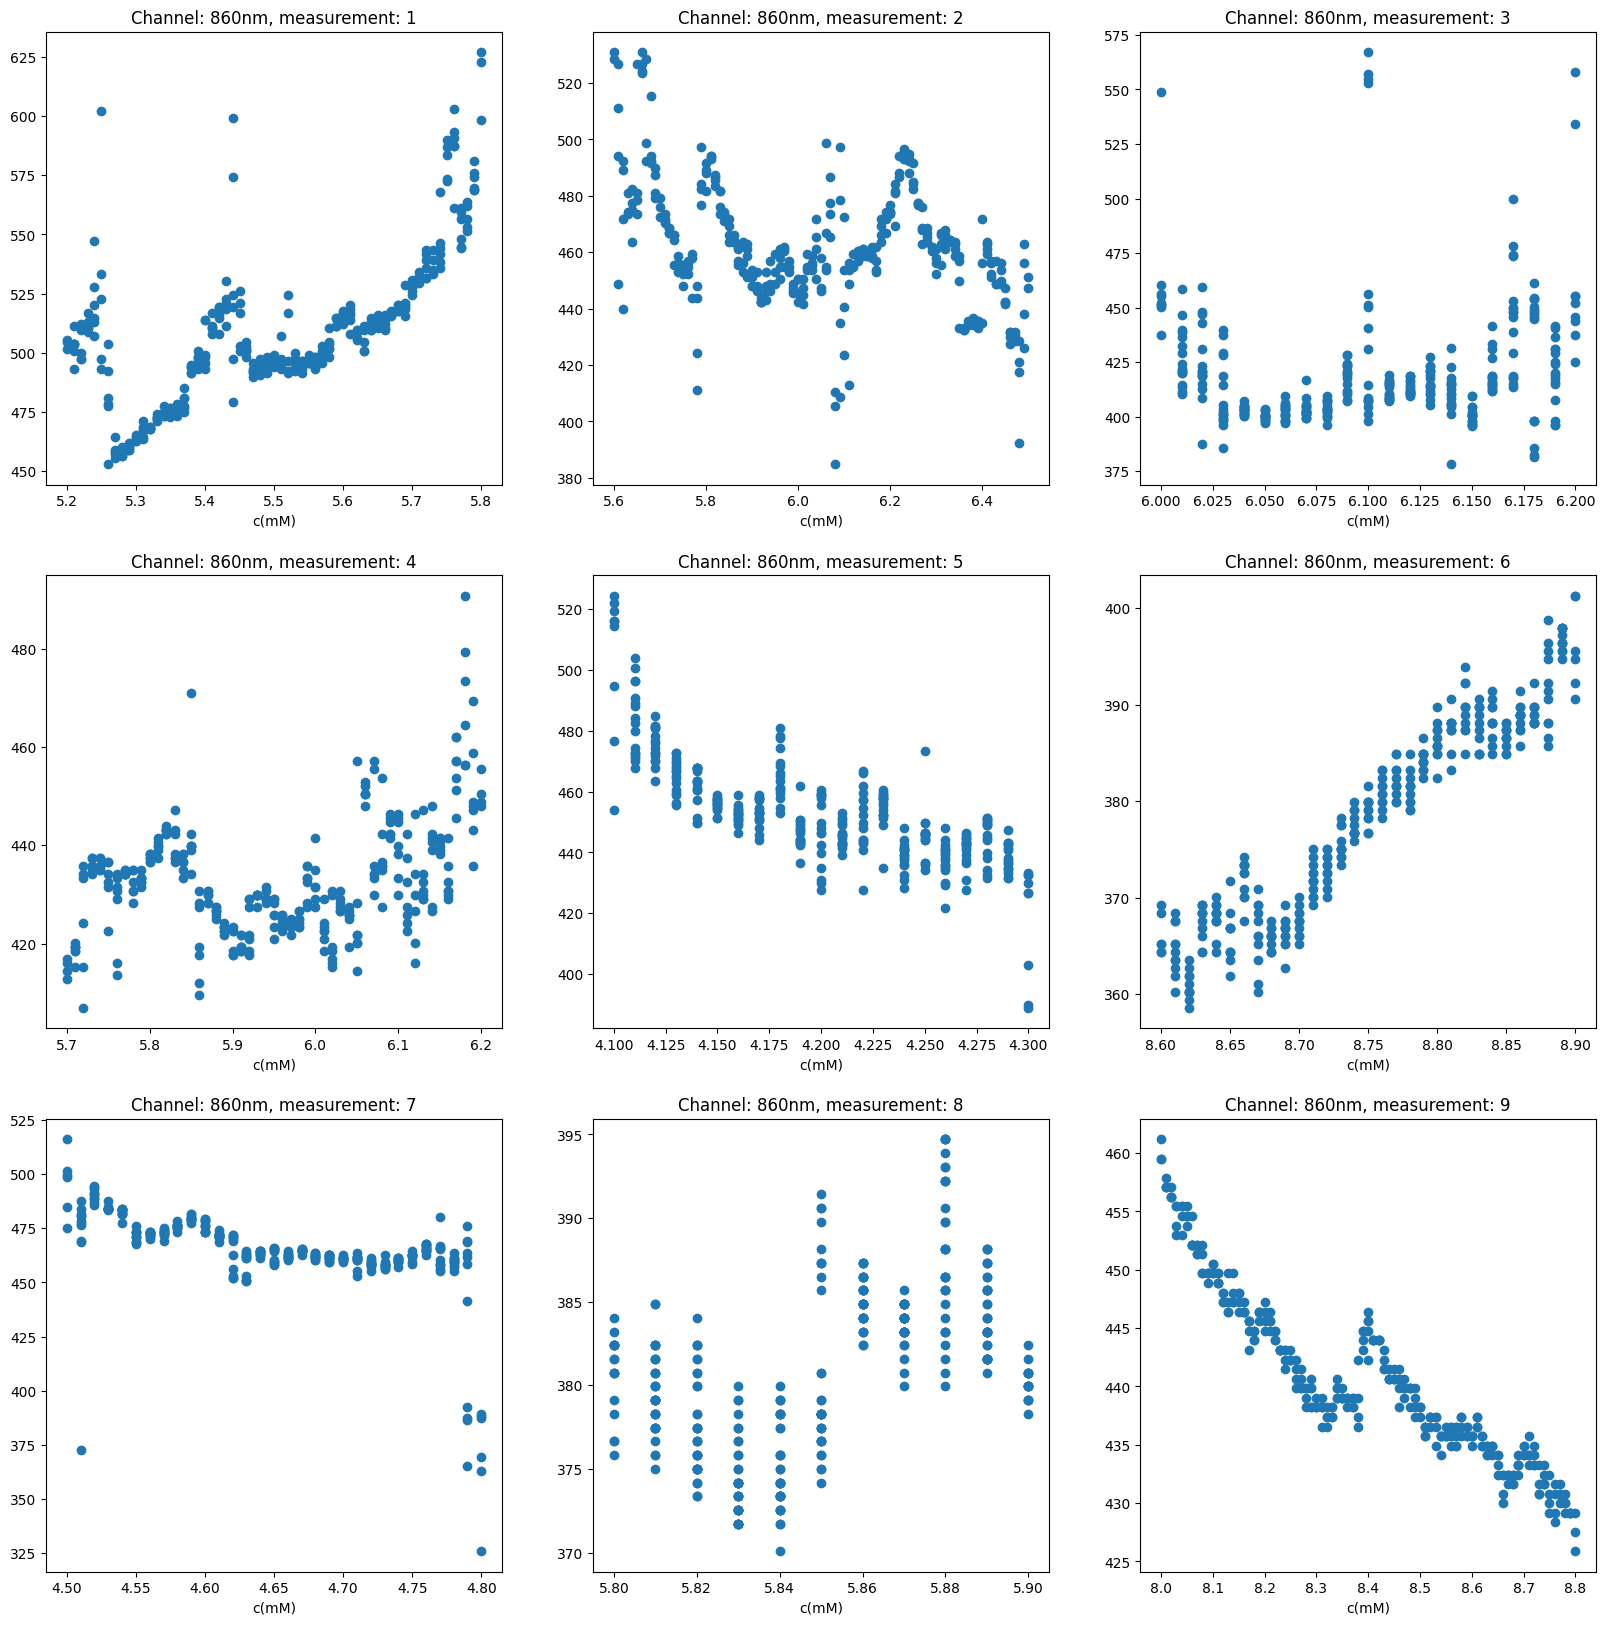

## Channel: 900nm

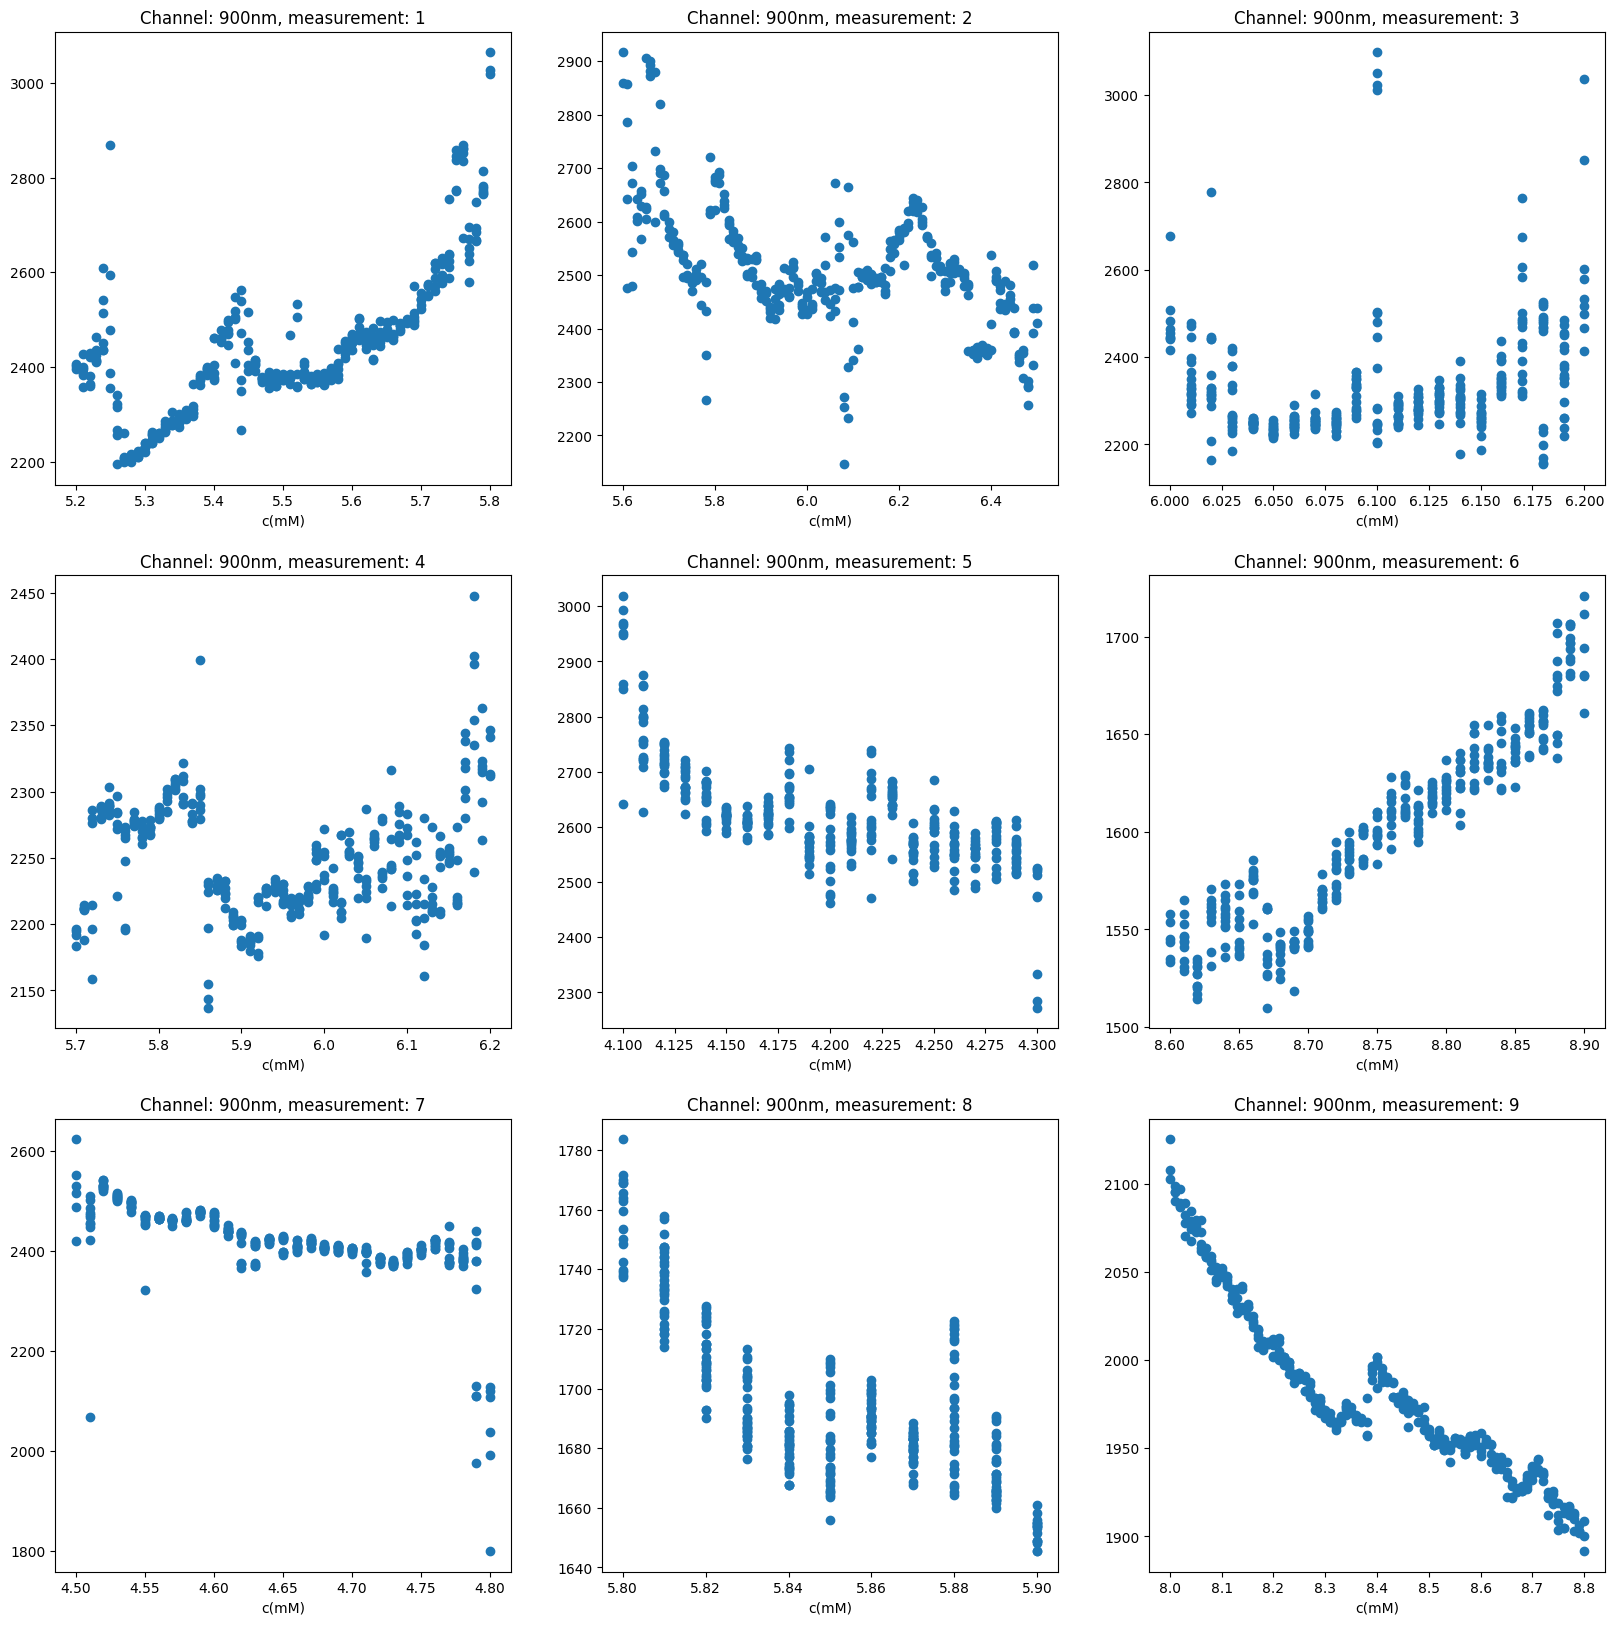

## Channel: 940nm

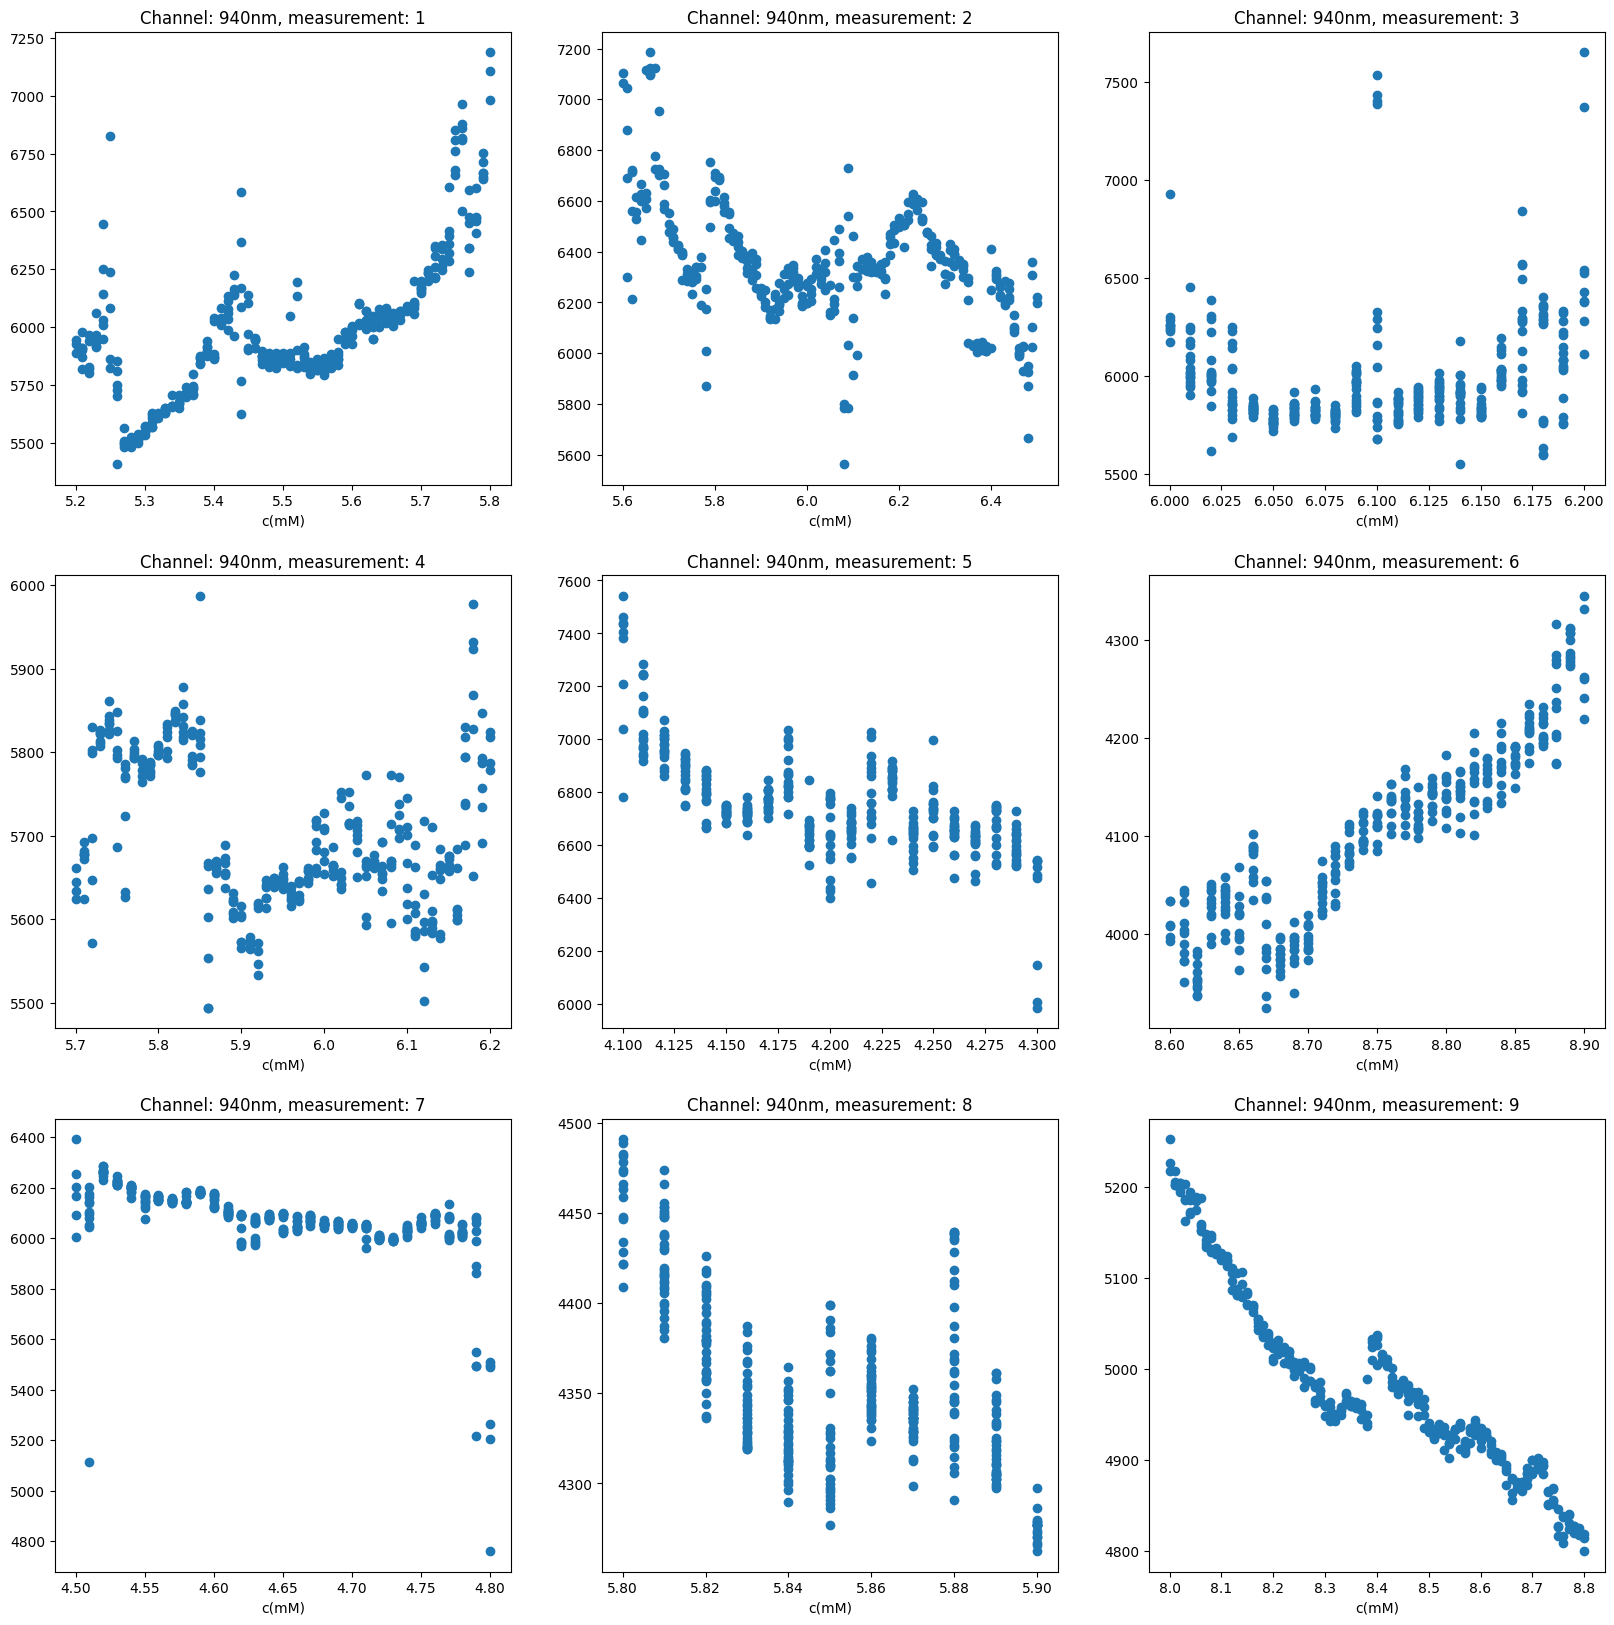

In [114]:
printHeadline("Intensity vs. Concentration. Separated by channel and measurement.")

for ix, channel in enumerate(channel_data):
    reshaped_x = channel["x"].reshape((-1, 335))
    reshaped_y = channel["y"].reshape((-1, 335))
    
    printHeadline(f"Channel: {channel['name']}")
    
    plt.figure(figsize=(20, 20))
    
    for i in range(reshaped_x.shape[0]):
        size = reshaped_x.shape[0]
        plt.subplot(math.ceil(size/3), 3, i + 1)
        plt.title(f"Channel: {channel['name']}, measurement: {i+1}")
        plt.xlabel("c(mM)")
        plt.scatter(reshaped_y[i], reshaped_x[i])
        
    plt.show()
        
    

## PCA of the data. Separated by measurement. Color indicates concentration.

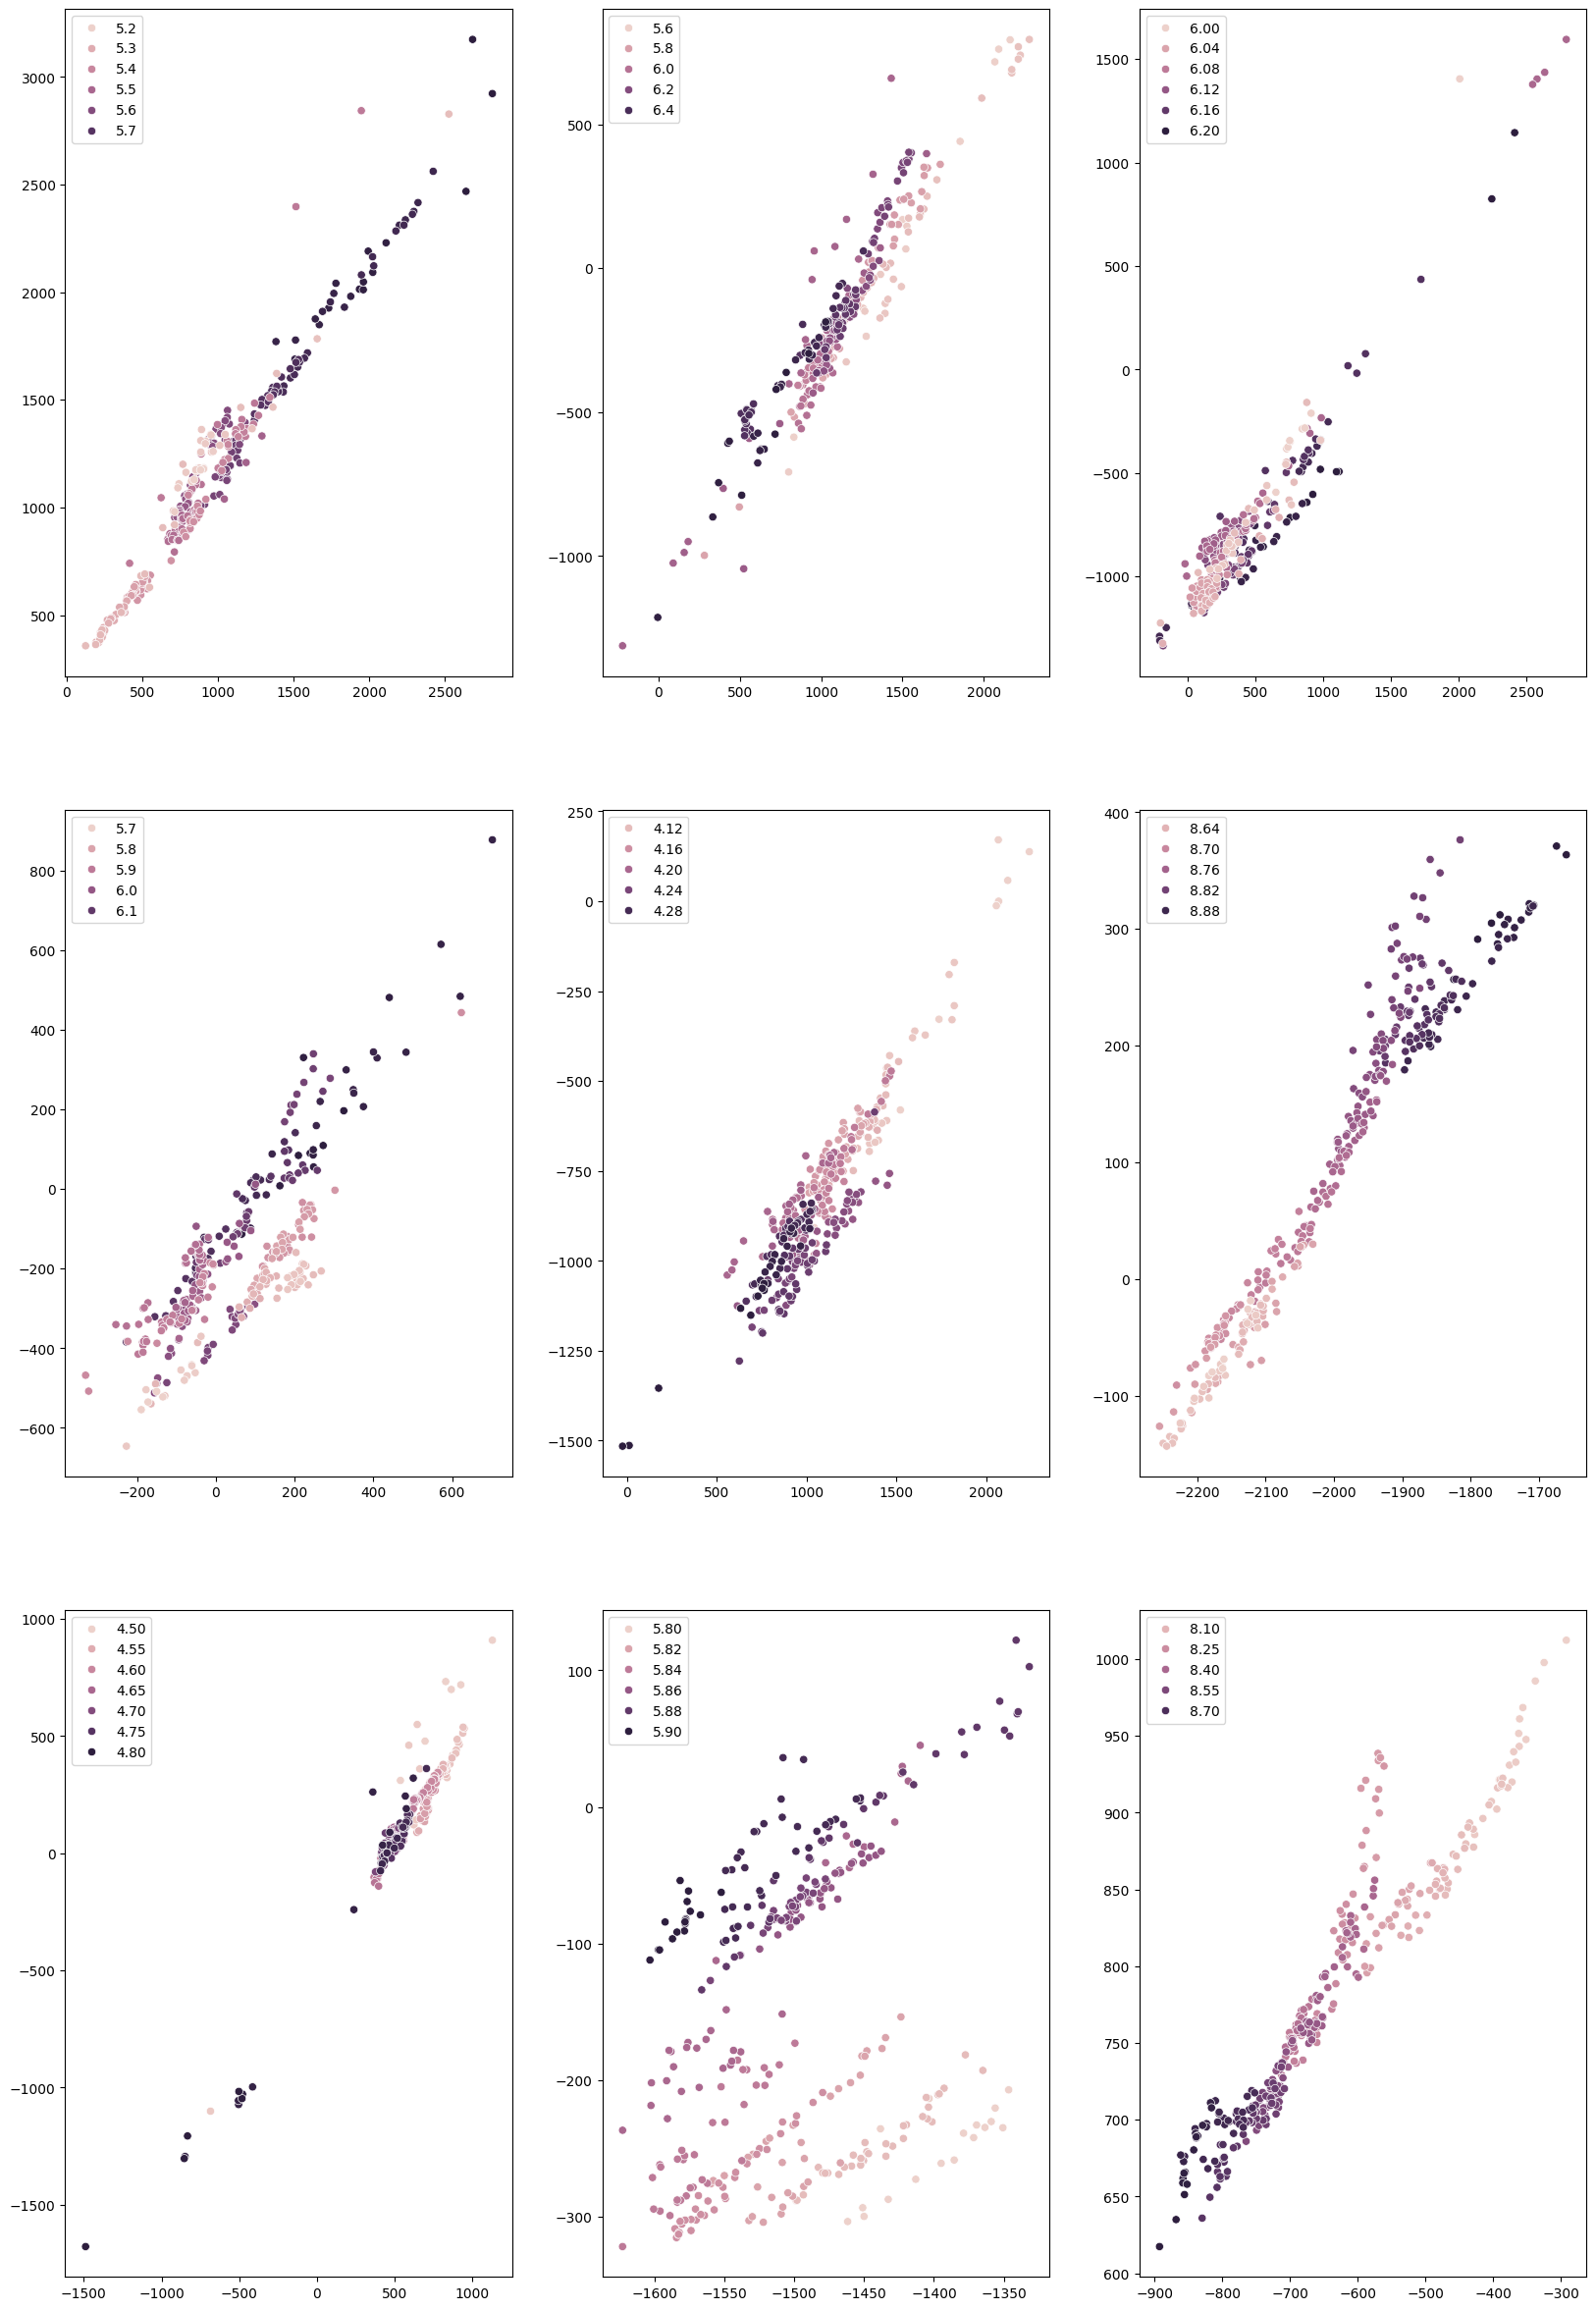

In [113]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
transformed = pca.fit_transform(dataX)

reshaped_X = transformed.reshape((-1, 335, 2))
reshaped_y = dataY.reshape((-1, 335))

printHeadline("PCA of the data. Separated by measurement. Color indicates concentration.")

plt.figure(figsize=(20, 30))

for i in range(reshaped_X.shape[0]):
    size = reshaped_X.shape[0]
    plt.subplot(math.ceil(size/3), 3, i + 1)
    sns.scatterplot(x = reshaped_X[i, :, 0], y = reshaped_X[i, :, 1],
                    hue=reshaped_y[i])
    
plt.show()